# OK Cupid Dataset

# Introduction

This dataset consist of a majority of catagorical veriables, there fore my approach to this will be: 

    1) preliminary data exploration
    2) data cleaning 
    3) filling in missing values
    4) encoding catagorical values
    
    5) unbiasing the data
        - the data is disproportionatly populated by people in their mid to late 20s
        - the magority of data is dominated by single people, which needs to be removed as it is not an outcome predictor
        - the sex colum need to be unbiased as there are more men than women. 
        
    6) Form Hypothesis 
        - We want to predict the statuse of some based on key characteristics, for example: 
            if the person is within specific age group
            if a person has particular interest and characteristics
            (this could be achieved through sorting data into specific groupings the examing the affect)
            
        - 
This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to ask; what is the likely status of a person based on seveal characteristics?.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.


## Scoping

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

### Project Goals

In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be. 


### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 


In [1]:
# Import libraries 

# Import data science libraries 
import pandas as pd
import re # regulate expression library 
import numpy as np

# Import data visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns

# import csv library
import csv

# Import data splitting librar
from sklearn.model_selection import train_test_split

#Import machine learning algorithm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Import metrics
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Load dataset direct from PC, importing form website would require a direct URL from the UCL website
okcupid = pd.read_csv('Desktop/Data Science Career Change/WIP Projects/WIP OK Cupid/OKCupid-Date-A-Scientist-Starter/OKCupid-Date-A-Scientist-Starter/profiles.csv',encoding='utf-8')


# Preliminary Data Exploration 

In [3]:
okcupid.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at:<br />\nhttp://bag...   

                                              essay3  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   
1                                                NaN  ...   
2  my large jaw and large glasses are the physica...  ...   
3                  socially awkward but i do my best  ...   
4            i smile a lot and my inquisitive nature  ...   

                          location  \
0  south san francisco, california   
1              oakland, california   
2        san francisco, california   
3             berkeley, california   
4        san francisco, california   

                                      offspring orientation  \
0  doesn&rsquo;t have kids, but might want them    straight   
1  doesn&rsquo;t have kids, but might want them    straight   
2                                           NaN    straight   
3                       doesn&rsquo;t want kids    straight   
4                                           NaN    straight   

                        pets                                  religion sex  \
0  likes dogs and likes cats     agnosticism and very serious about it   m   
1  likes dogs and likes cats  agnosticism but not too serious about it   m   
2                   has cats                                       NaN   m   
3                 likes cats                                       NaN   m   
4  likes dogs and likes cats                                       NaN   m   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks     status  
0                                            english     single  
1  english (fluently), spanish (poorly), french (...     single  
2                               english, french, c++  available  
3                           english, german (poorly)     single  
4                                            english     single  

[5 rows x 31 columns]

# First Lets Explore the Data

#### To guage the status of a person I would first like to explore the distribution of data to understand how balance it is and any specific salient characteristics, for example:

####   - What is the distribution of data
####   - Are there any salient characteristics 
####   - Key indicators which may predict the status of people. 



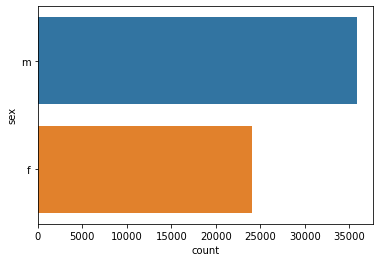

In [4]:
#okcupid['sex'].value_counts()

sns.countplot(data=okcupid, y="sex");

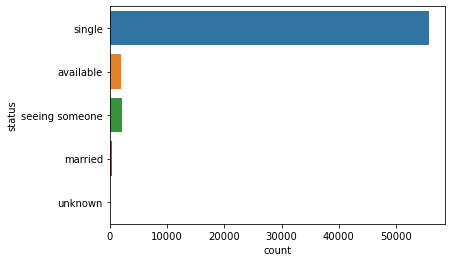

In [5]:
#okcupid['status'].value_counts()

sns.countplot(data=okcupid, y="status");

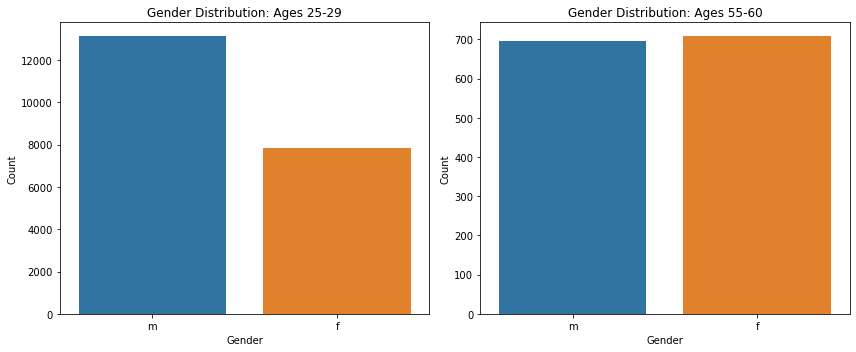

In [6]:
# Filter for users aged 25 to 29
filtered_25 = okcupid[(okcupid['age'] >= 25) & (okcupid['age'] <= 30)]

# Filter for users aged 55 to 60
filtered_55 = okcupid[(okcupid['age'] >= 55) & (okcupid['age'] <= 60)]

# Count occurrences of males and females

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots

# First plot: Gender distribution for ages 25-29
sns.countplot(data=filtered_25, x='sex', ax=axes[0])
axes[0].set_title("Gender Distribution: Ages 25-29")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

# Second plot: Gender distribution for ages 55-60
sns.countplot(data=filtered_55, x='sex', ax=axes[1])
axes[1].set_title("Gender Distribution: Ages 55-60")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display both plots simultaneously




In [7]:
# Define the statuses to keep
statuses_to_keep = ["married", "available", "seeing someone"]

# Filter the dataframe
filtered_status_25 = filtered_25[filtered_25['status'].isin(statuses_to_keep)]
filtered_status_55 = filtered_55[filtered_55['status'].isin(statuses_to_keep)]

# Get value counts and unnormalize
status_update_25un = filtered_status_25['status'].value_counts()
status_update_55un = filtered_status_55['status'].value_counts()

# Get value counts and normalize
status_update_25 = filtered_status_25['status'].value_counts(normalize=True) * 100
status_update_55 = filtered_status_55['status'].value_counts(normalize=True) * 100

#print(status_update_25)

#print(status_update_55)


# Create a DataFrame for better formatting
status_unnormalised = pd.DataFrame({'Age 25-30': status_update_25un, 'Age 55-60': status_update_55un})
status_normalised = pd.DataFrame({'Age 25-30': status_update_25, 'Age 55-60': status_update_55})

# Display formatted output with aligned columns
# Print unnormalized dataframe
print(status_unnormalised)
print("\n" + "-"*40 + "\n")  # Adds a separator line with space

# Print normalized dataframe
print(status_normalised)



                Age 25-30  Age 55-60
available             594         37
married                79         12
seeing someone        883         12

----------------------------------------

                Age 25-30  Age 55-60
available       38.174807  60.655738
married          5.077121  19.672131
seeing someone  56.748072  19.672131


In [8]:
# Add styling to the DataFrames
styled_unnormalised = status_unnormalised.style.set_caption("Unnormalized Status Distribution")\
    .set_table_styles([{'selector': 'table', 'props': [('border', '2px solid black')]}])

styled_normalised = status_normalised.style.set_caption("Normalized Status Distribution")\
    .set_table_styles([{'selector': 'table', 'props': [('border', '2px solid black')]}])

# Display styled DataFrames
display(styled_unnormalised)
print("\n" + "-"*40 + "\n")  # Separator for clarity
display(styled_normalised)



----------------------------------------



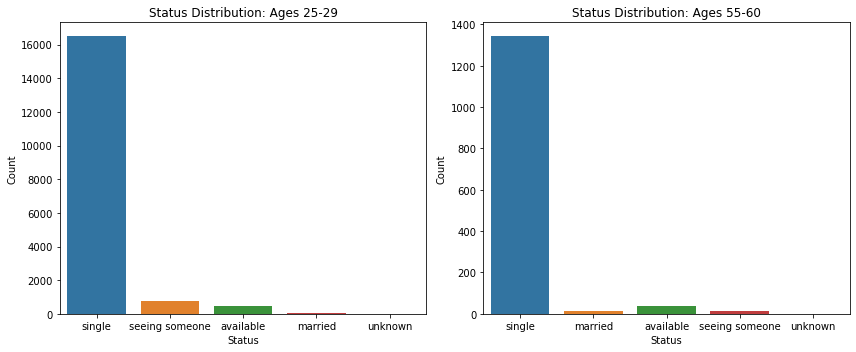

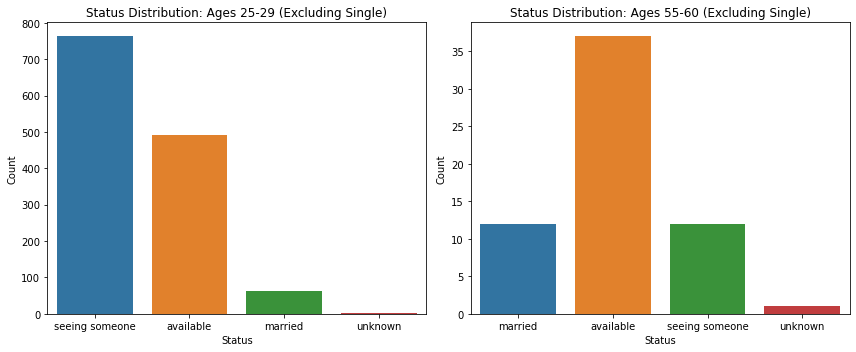

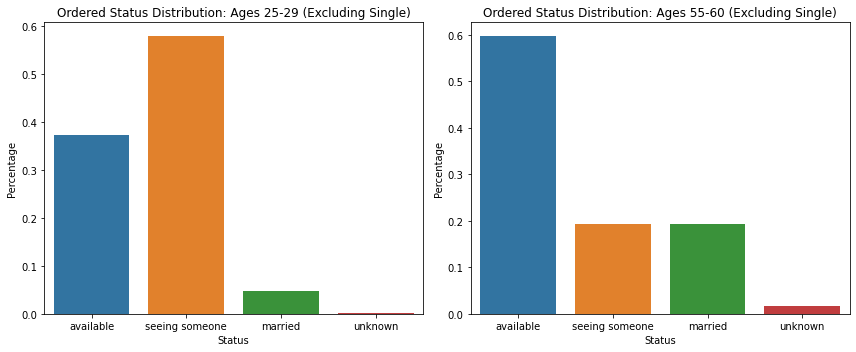

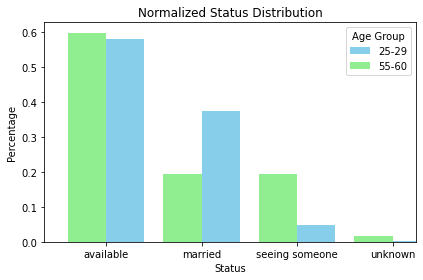

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter users based on age groups
filtered_25 = okcupid[(okcupid['age'] >= 25) & (okcupid['age'] <= 29)]
filtered_55 = okcupid[(okcupid['age'] >= 55) & (okcupid['age'] <= 60)]

# Remove 'single' category from both age groups
filtered_25msc = filtered_25[filtered_25['status'] != "single"]
filtered_55msc = filtered_55[filtered_55['status'] != "single"]

# Plot the distribution of relationship status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=filtered_25, x='status', ax=axes[0])
axes[0].set_title("Status Distribution: Ages 25-29")
axes[0].set_xlabel("Status")
axes[0].set_ylabel("Count")

sns.countplot(data=filtered_55, x='status', ax=axes[1])
axes[1].set_title("Status Distribution: Ages 55-60")
axes[1].set_xlabel("Status")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Replot without 'single' category
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=filtered_25msc, x='status', ax=axes[0])
axes[0].set_title("Status Distribution: Ages 25-29 (Excluding Single)")
axes[0].set_xlabel("Status")
axes[0].set_ylabel("Count")

sns.countplot(data=filtered_55msc, x='status', ax=axes[1])
axes[1].set_title("Status Distribution: Ages 55-60 (Excluding Single)")
axes[1].set_xlabel("Status")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Normalize data for comparison
filtered_25norm = filtered_25msc['status'].value_counts(normalize=True).reset_index()
filtered_25norm.columns = ['status', 'percentage']

filtered_55norm = filtered_55msc['status'].value_counts(normalize=True).reset_index()
filtered_55norm.columns = ['status', 'percentage']

# Define custom order for better visualization
custom_order = ['available'] + [cat for cat in filtered_25norm["status"] if cat not in ['available', 'unknown']] + ['unknown']

# Plot normalized status distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=filtered_25norm, x='status', y='percentage', ax=axes[0], order=custom_order)
axes[0].set_title("Ordered Status Distribution: Ages 25-29 (Excluding Single)")
axes[0].set_xlabel("Status")
axes[0].set_ylabel("Percentage")

sns.barplot(data=filtered_55norm, x='status', y='percentage', ax=axes[1], order=custom_order)
axes[1].set_title("Ordered Status Distribution: Ages 55-60 (Excluding Single)")
axes[1].set_xlabel("Status")
axes[1].set_ylabel("Percentage")

plt.tight_layout()
plt.show()

# Plot normalized values side by side
fig, ax = plt.subplots(figsize=(6, 4))

filtered_25norm.set_index('status')['percentage'].plot(kind='bar', color='skyblue', position=0, width=0.4, ax=ax, label='25-29')
filtered_55norm.set_index('status')['percentage'].plot(kind='bar', color='lightgreen', position=1, width=0.4, ax=ax, label='55-60')

ax.legend(title="Age Group")
plt.title('Normalized Status Distribution')
plt.xlabel('Status')
plt.ylabel('Percentage')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Distribution of Genders

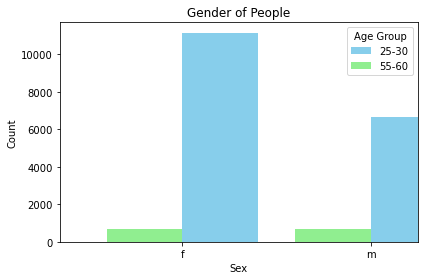

In [10]:
import matplotlib.pyplot as plt
# Count occurrences of males and females
sex_counts_25 = filtered_25['sex'].value_counts()
sex_counts_55 = filtered_55['sex'].value_counts()


# Plot the data

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each dataset on the same axes with labels for the legend
sex_counts_25.plot(kind='bar', color='skyblue', position=0, width=0.4, ax=ax, label='25-30')
sex_counts_55.plot(kind='bar', color='lightgreen', position=1, width=0.4, ax=ax, label='55-60')

# Add the legend
ax.legend(title="Age Group")

# Adjust labels and title
plt.title('Gender of People')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.xticks(rotation=0)  # Keep labels readable
plt.tight_layout()
plt.show()


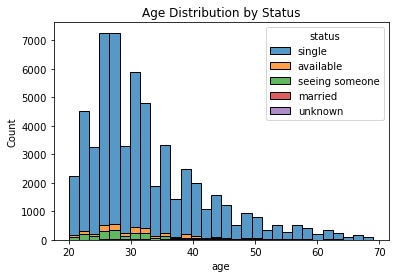

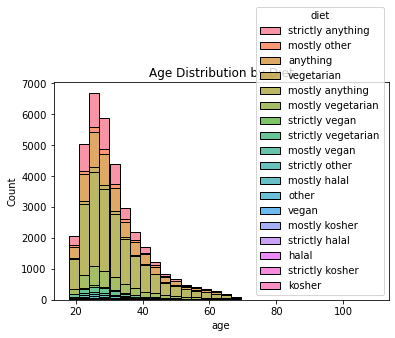

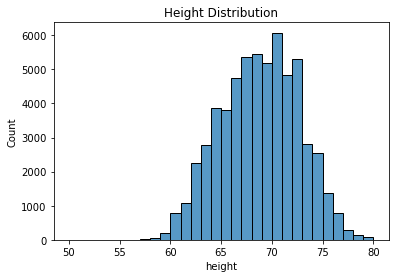

In [11]:
# Ensure consistency in DataFrame references
filtered_age = okcupid[(okcupid['age'] >= 20) & (okcupid['age'] <= 70)]

# Create a histogram for age with categorical differentiation
sns.histplot(data=filtered_age, x="age", hue="status", multiple="stack", bins=30)
plt.title("Age Distribution by Status")
plt.show()

# Create a histogram for diet
sns.histplot(data=okcupid, x="age", hue="diet", multiple="stack", bins=30)
plt.title("Age Distribution by Diet")
plt.show()

# Filter height data correctly
filtered_height = okcupid[(okcupid['height'] >= 50) & (okcupid['height'] <= 80)]

# Create a histogram for height distribution
sns.histplot(data=filtered_height, x="height", bins=30)
plt.title("Height Distribution")
plt.show()


After the information has sperated into yonger and older age groups we conclude: 

    - there is an higher percentage of younger people that are married and single 
    - old peo are almost evenly balaced between sex type compared to younge people. 
    - There are significantly more young  and single people than old. 
    - the proportion of groups only change marginally with age be a definate trend exists. 
    
    - The single and young group should be analysed further for any patterns.
    - the whole data set should be balance to determine any comparitive variation. 

In [12]:
okcupid.shape

(59946, 31)

In [13]:
okcupid.describe()

age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000

In [14]:
print(okcupid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [15]:
# Examine rows with Missing Values 
okcupid[okcupid.isnull().any(axis=1)] # filter any rows to include any row whose value is null

age body_type             diet      drinks      drugs  \
1       35   average     mostly other       often  sometimes   
2       38      thin         anything    socially        NaN   
3       23      thin       vegetarian    socially        NaN   
4       29  athletic              NaN    socially      never   
5       29   average  mostly anything    socially        NaN   
...    ...       ...              ...         ...        ...   
59939   52       NaN              NaN    socially      never   
59940   31       NaN              NaN    socially      never   
59941   59       NaN              NaN    socially      never   
59943   42   average  mostly anything  not at all      never   
59945   39   average              NaN    socially        NaN   

                               education  \
1                  working on space camp   
2         graduated from masters program   
3          working on college/university   
4      graduated from college/university   
5      graduated from college/university   
...                                  ...   
59939  graduated from college/university   
59940         working on masters program   
59941  graduated from college/university   
59943     graduated from masters program   
59945     graduated from masters program   

                                                  essay0  \
1      i am a chef: this is what that means.<br />\n1...   
2      i'm not ashamed of much, but writing public te...   
3              i work in a library and go to school. . .   
4      hey how's it going? currently vague on the pro...   
5      i'm an australian living in san francisco, but...   
...                                                  ...   
59939  hi there and thanks for checking out my profil...   
59940  real deal: i am sensitive (sorry, tears includ...   
59941  vibrant, expressive, caring optimist. i love b...   
59943  hello! i enjoy traveling, watching movies, and...   
59945  is it odd that having a little "enemy" status ...   

                                                  essay1  \
1      dedicating everyday to being an unbelievable b...   
2      i make nerdy software for musicians, artists, ...   
3              reading things written by old dead people   
4                             work work work work + play   
5      building awesome stuff. figuring out what's im...   
...                                                  ...   
59939  i'm spending time enjoying the best job i've e...   
59940  right now...watching 'celebrity rehab' and com...   
59941  the happiest times have been when life came to...   
59943  i'm a civil engineer, who enjoys helping the c...   
59945  i work with elderly people (psychotherapy and ...   

                                                  essay2  \
1      being silly. having ridiculous amonts of fun w...   
2      improvising in different contexts. alternating...   
3      playing synthesizers and organizing books acco...   
4      creating imagery to look at:<br />\nhttp://bag...   
5      imagining random shit. laughing at aforementio...   
...                                                  ...   
59939  making cool electronic stuff, being someone pe...   
59940  eating chocolate and doing pilates (usually no...   
59941  i make an outstanding osso bucco. i am also ve...   
59943  - looking at things objectively<br />\n- getti...   
59945  i'm a great bullshitter. i don't know what it ...   

                                                  essay3  ...  \
1                                                    NaN  ...   
2      my large jaw and large glasses are the physica...  ...   
3                      socially awkward but i do my best  ...   
4                i smile a lot and my inquisitive nature  ...   
5      i have a big smile. i also get asked if i'm we...  ...   
...                                                  ...  ...   
59939  i needed an expert opinion for this section so...  ...   
59940  my hair? eyes? heig

In [16]:
print(okcupid.drugs.unique()) # print all unique values in a particular column
print(okcupid.ethnicity.unique())

['never' 'sometimes' nan 'often']
['asian, white' 'white' nan 'asian, black, other' 'white, other'
 'hispanic / latin, white' 'hispanic / latin' 'pacific islander, white'
 'asian' 'black, white' 'pacific islander' 'asian, native american'
 'asian, pacific islander' 'black, native american, white'
 'middle eastern, other' 'native american, white' 'indian' 'black'
 'black, native american, hispanic / latin, other'
 'black, native american, hispanic / latin'
 'asian, black, pacific islander'
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other'
 'other' 'hispanic / latin, other' 'asian, black' 'middle eastern, white'
 'native american, white, other' 'black, native american'
 'black, white, other' 'hispanic / latin, white, other' 'middle eastern'
 'black, other' 'native american, hispanic / latin, white' 'black, indian'
 'indian, white, other' 'middle eastern, indian, other'
 'black, native american, hispanic / latin, white, other'
 'pac

In [17]:
okcupid['status'].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

# Data Cleaning, Wrangling and Tidying 

Preliminary data cleaning

In [18]:
# From priliminary observation I cannot detect any duplicate rows 
# the .drop_duplicates() function removes duplicate rows
okcupid = okcupid.drop_duplicates() 

# Total number of rows
total_rows = len(okcupid)

# Number of unique rows
unique_rows = len(okcupid.drop_duplicates())

# Number of duplicate rows
duplicate_rows = total_rows - unique_rows

# Print the number of duplicates
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [19]:
okcupid['status'].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [20]:
# it looks like all of the data is in lowercase, however I will scan the data to make sure.
okcupid.columns = map(str.lower, okcupid.columns)

In [21]:
# axis=1` refers to the columns, `axis=0` would refer to the rows
# In the dictionary the key refers to the original column name and the value refers to the new column name {'oldname1': 'newname1', 'oldname2': 'newname2'}
okcupid = okcupid.rename({'essay0': 'about_me', 'essay1': 'employment', 'essay2': 'hobbies' ,'essay3': 'appearance','essay4': 'fouvourite_music_and_tv','essay5': 'likes','essay6': 'aspirations','essay7': 'weekend','essay8': 'fun_fact','essay9': 'ideal_date'}, axis=1)


# the .head(10) function will show us the first 10 rows in our dataset
okcupid.head(1)

age       body_type               diet    drinks  drugs  \
0   22  a little extra  strictly anything  socially  never   

                       education  \
0  working on college/university   

                                            about_me  \
0  about me:<br />\n<br />\ni would love to think...   

                                          employment  \
0  currently working as an international agent fo...   

                                             hobbies  \
0  making people laugh.<br />\nranting about a go...   

                                          appearance  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   

                          location  \
0  south san francisco, california   

                                      offspring orientation  \
0  doesn&rsquo;t have kids, but might want them    straight   

                        pets                               religion sex  \
0  likes dogs and likes cats  agnosticism and very serious about it   m   

     sign     smokes   speaks  status  
0  gemini  sometimes  english  single  

[1 rows x 31 columns]

In [22]:
okcupid.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'about_me',
       'employment', 'hobbies', 'appearance', 'fouvourite_music_and_tv',
       'likes', 'aspirations', 'weekend', 'fun_fact', 'ideal_date',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status'],
      dtype='object')

In [23]:
# Observing the datasets data types
okcupid.dtypes
# There are three types of variable, interger, object and floats but no bolean variables

age                          int64
body_type                   object
diet                        object
drinks                      object
drugs                       object
education                   object
about_me                    object
employment                  object
hobbies                     object
appearance                  object
fouvourite_music_and_tv     object
likes                       object
aspirations                 object
weekend                     object
fun_fact                    object
ideal_date                  object
ethnicity                   object
height                     float64
income                       int64
job                         object
last_online                 object
location                    object
offspring                   object
orientation                 object
pets                        object
religion                    object
sex                         object
sign                        object
smokes              

We see that our data consists of lots of different appearance which cannot be correct and may require some generalisation, as well as in other catagores. From initial inspection of the dataset there where some missing or NaN data but this does not appear. Therefore it may be usful to explore if there are correlation between the person type, habbits and body type or locaton etc...



In [24]:
# Find the number of unique values in the dataframe

unique_counts = okcupid.nunique()

print(unique_counts)

age                           54
body_type                     12
diet                          18
drinks                         6
drugs                          3
education                     32
about_me                   54350
employment                 51516
hobbies                    48635
appearance                 43533
fouvourite_music_and_tv    49260
likes                      48963
aspirations                43603
weekend                    45554
fun_fact                   39324
ideal_date                 45443
ethnicity                    217
height                        60
income                        13
job                           21
last_online                30123
location                     199
offspring                     15
orientation                    3
pets                          15
religion                      45
sex                            2
sign                          48
smokes                         5
speaks                      7647
status    

In [25]:
# String Parsing

# We need to reduce the amount of unique values with the free-text columns to...
    #1) remove unnecessary information reges
    #2) tokenisation
    

okcupid.about_me                = okcupid['about_me'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.employment              = okcupid['employment'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.hobbies                 = okcupid['hobbies'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.appearance              = okcupid['appearance'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.fouvourite_music_and_tv = okcupid['fouvourite_music_and_tv'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.likes                   = okcupid['likes'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.aspirations             = okcupid['aspirations'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.weekend                 = okcupid['weekend'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.fun_fact                = okcupid['fun_fact'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.ideal_date              = okcupid['ideal_date'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.ethnicity               = okcupid['ethnicity'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)


# Preliminary Transformation of body type, diet, drinks, drugs, education, job, smaokes, status, location, offspring


# orientation, pets, religion, sex and sign  
# Ethnicy may require refinement to reduce unique valiables
# Speaks may require parsing eg first language, second language and other
# last-online requires parsing

#okcupid.body_type = pd.to_numeric(okcupid['body_type'])

#print(okcupid.body_type[2])
unique_counts = okcupid.nunique()
print(unique_counts)

age                           54
body_type                     12
diet                          18
drinks                         6
drugs                          3
education                     32
about_me                   54341
employment                 51495
hobbies                    48627
appearance                 43434
fouvourite_music_and_tv    49255
likes                      48956
aspirations                43530
weekend                    45488
fun_fact                   39263
ideal_date                 45412
ethnicity                    217
height                        60
income                        13
job                           21
last_online                30123
location                     199
offspring                     15
orientation                    3
pets                          15
religion                      45
sex                            2
sign                          48
smokes                         5
speaks                      7647
status    

In [26]:
# spintting the 'last online' column into individual colums
# this cell contains multiple measurements in a single column, for example, YYYY-MM-DD-HH-MM
# It need to split into individual parts

okcupid['last_online'].value_counts() 

# Create the 'month' column
okcupid['month'] = okcupid.last_online.str[0:2]

# Create the 'day' column
okcupid['day'] = okcupid.last_online.str[3:5]

# Create the 'year' column
okcupid['year'] = okcupid.last_online.str[6:7]

# Create the 'day' column
okcupid['hour'] = okcupid.last_online.str[9:10]

# Create the 'year' column
okcupid['minute'] = okcupid.last_online.str[12:]


In [27]:
# print all unique values in a job column
print(okcupid.job.unique())

['transportation' 'hospitality / travel' nan 'student'
 'artistic / musical / writer' 'computer / hardware / software'
 'banking / financial / real estate' 'entertainment / media'
 'sales / marketing / biz dev' 'other' 'medicine / health'
 'science / tech / engineering' 'executive / management'
 'education / academia' 'clerical / administrative'
 'construction / craftsmanship' 'rather not say' 'political / government'
 'law / legal services' 'unemployed' 'military' 'retired']


In [28]:
# Standardising information withint he 'jobs' columns

# Replace 'engineer/maths/science' with 'stem' in the 'subject' column
okcupid['job'] = okcupid['job'].str.replace(r'hospitality / travel', 'hospitality_travel', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'artistic / musical / writer', 'musician', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'computer / hardware / software', 'computing', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'banking / financial / real estate', 'banking_real estate', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'entertainment / media', 'entertainment_media', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'sales / marketing / biz dev', 'sales_marketing', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'medicine / health', 'healthcare', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'science / tech / engineering', 'stem', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'executive / management', 'ceo', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'education / academia', 'teaching', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'clerical / administrative', 'admin', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'construction / craftsmanship', 'construction', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'political / government', 'govenment', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'law / legal services', 'legal_services', regex=True)

# Save the modified DataFrame back to a CSV file
#df.to_csv('modified_file.csv', index=False)


# Remove missing values

In [29]:
okcupid['status'].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [30]:
# Removing Duplicates

duplicates = okcupid.duplicated()
print(duplicates.head())
print(duplicates.value_counts())
okcupid = okcupid.drop_duplicates()
duplicates = okcupid.duplicated()
print(duplicates.head())
print(duplicates.value_counts())

# Therefore we can observe that there are no duplicates

0    False
1    False
2    False
3    False
4    False
dtype: bool
False    59946
dtype: int64
0    False
1    False
2    False
3    False
4    False
dtype: bool
False    59946
dtype: int64


In [31]:
# To replace NaN values in all columns of a DataFrame, you can use the .fillna() method. Here’s how to do it for all 31 columns:

# Replace NaN values in all columns with a specific value, e.g., 0
#df = df.fillna(0)

# To replace NaN values in a specific column called job, use the .fillna() method on that column. Here’s how:

# Replace NaN values in the 'job' column with a specific value, e.g., 'Unknown'
okcupid['body_type'] = okcupid['body_type'].fillna('undisclosed')
okcupid['diet'] = okcupid['diet'].fillna('other')

# Calculate the mode (most frequent value) as it may better reflect actual behaviour than just simply specify other
mode_value = okcupid['drinks'].mode()[0]
# Fill missing values with the mode
okcupid['drinks'].fillna(mode_value, inplace=True)

okcupid['drugs'] = okcupid['drugs'].fillna('undisclosed')
okcupid['education'] = okcupid['education'].fillna('undisclosed')

okcupid['about_me'] = okcupid['about_me'].fillna('undisclosed')
okcupid['employment'] = okcupid['employment'].fillna('undisclosed')
okcupid['hobbies'] = okcupid['hobbies'].fillna('undisclosed')
okcupid['appearance'] = okcupid['appearance'].fillna('undisclosed')
okcupid['fouvourite_music_and_tv'] = okcupid['fouvourite_music_and_tv'].fillna('undisclosed')
okcupid['likes'] = okcupid['likes'].fillna('undisclosed')
okcupid['aspirations'] = okcupid['aspirations'].fillna('undisclosed')
okcupid['weekend'] = okcupid['weekend'].fillna('undisclosed')
okcupid['fun_fact'] = okcupid['fun_fact'].fillna('undisclosed')
okcupid['ideal_date'] = okcupid['ideal_date'].fillna('undisclosed')
okcupid['ethnicity'] = okcupid['ethnicity'].fillna('other')

okcupid['speaks'] = okcupid['speaks'].fillna('other')
okcupid['job'] = okcupid['job'].fillna('other')

# for height and smokes I will using imputation to predict the best value as entry to will likely follow a patter or predictable distriution. 
okcupid['height'].ffill(axis=0, inplace=True) #LOCF apply fill forward
okcupid['smokes'].bfill(axis=0, inplace=True) #NOCB apply fill backwards as there are more 'no' values

okcupid['offspring'] .bfill(axis=0, inplace=True)
okcupid['pets'] .bfill(axis=0, inplace=True)
okcupid['religion'] .bfill(axis=0, inplace=True)
okcupid['sign'] .bfill(axis=0, inplace=True)


# Save the modified DataFrame back to a CSV file if needed
#df.to_csv('modified_file.csv', index=False)


In [32]:
# counts the number of missing values in each column 
okcupid.isna().sum() 

# We see that there are missing values in most colums and from an initial inspection these are empty boxes


age                        0
body_type                  0
diet                       0
drinks                     0
drugs                      0
education                  0
about_me                   0
employment                 0
hobbies                    0
appearance                 0
fouvourite_music_and_tv    0
likes                      0
aspirations                0
weekend                    0
fun_fact                   0
ideal_date                 0
ethnicity                  0
height                     0
income                     0
job                        0
last_online                0
location                   0
offspring                  1
orientation                0
pets                       0
religion                   0
sex                        0
sign                       0
smokes                     0
speaks                     0
status                     0
month                      0
day                        0
year                       0
hour          

## Transforming the data 

### (see Encoding Categorical Variables article >> under Data Transformations for Feature Analysis>> machine learning fundamentals)

In [33]:
okcupid['status'].value_counts()
#okcupid_reset.drinks_rating.value_counts(normalize=True)

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [34]:
# using nominal encoding 

# convert feature to category type
okcupid['hobbies'] = okcupid['hobbies'].astype('category')
okcupid['appearance'] = okcupid['appearance'].astype('category')
okcupid['fouvourite_music_and_tv'] = okcupid['fouvourite_music_and_tv'].astype('category')
okcupid['likes'] = okcupid['likes'].astype('category')
okcupid['aspirations'] = okcupid['aspirations'].astype('category')
okcupid['weekend'] = okcupid['weekend'].astype('category')
okcupid['fun_fact'] = okcupid['fun_fact'].astype('category')
okcupid['ideal_date'] = okcupid['ideal_date'].astype('category')
okcupid['ethnicity'] = okcupid['ethnicity'].astype('category')
okcupid['speaks'] = okcupid['speaks'].astype('category')
okcupid['job'] = okcupid['job'].astype('category')

okcupid['about_me'] = okcupid['about_me'].astype('category')
okcupid['employment'] = okcupid['employment'].astype('category')
okcupid['location'] = okcupid['location'].astype('category')
okcupid['offspring'] = okcupid['offspring'].astype('category')
okcupid['orientation'] = okcupid['orientation'].astype('category')
okcupid['pets'] = okcupid['pets'].astype('category')
okcupid['religion'] = okcupid['religion'].astype('category')
okcupid['sex'] = okcupid['sex'].astype('category')
okcupid['sign'] = okcupid['sign'].astype('category')
okcupid['smokes'] = okcupid['smokes'].astype('category')
okcupid['status'] = okcupid['status'].astype('category')

okcupid['year'] = okcupid['year'].astype('category')
okcupid['month'] = okcupid['month'].astype('category')
okcupid['day'] = okcupid['year'].astype('category')
okcupid['hour'] = okcupid['month'].astype('category')
okcupid['minute'] = okcupid['year'].astype('category')

# save new version of category codes
okcupid['hobbies'] = okcupid['hobbies'].cat.codes
okcupid['appearance'] = okcupid['appearance'].cat.codes
okcupid['fouvourite_music_and_tv'] = okcupid['fouvourite_music_and_tv'].cat.codes
okcupid['likes'] = okcupid['likes'].cat.codes
okcupid['aspirations'] = okcupid['aspirations'].cat.codes
okcupid['weekend'] = okcupid['weekend'].cat.codes
okcupid['fun_fact'] = okcupid['fun_fact'].cat.codes
okcupid['ideal_date'] = okcupid['ideal_date'].cat.codes
okcupid['ethnicity'] = okcupid['ethnicity'].cat.codes
okcupid['speaks'] = okcupid['speaks'].cat.codes
okcupid['job'] = okcupid['job'].cat.codes

okcupid['about_me'] = okcupid['about_me'].cat.codes
okcupid['employment'] = okcupid['employment'].cat.codes
okcupid['location'] = okcupid['location'].cat.codes
okcupid['offspring'] = okcupid['offspring'].cat.codes
okcupid['orientation'] = okcupid['orientation'].cat.codes
okcupid['pets'] = okcupid['pets'].cat.codes
okcupid['religion'] = okcupid['religion'].cat.codes
okcupid['sex'] = okcupid['sex'].cat.codes
okcupid['sign'] = okcupid['sign'].cat.codes
okcupid['smokes'] = okcupid['smokes'].cat.codes
okcupid['status'] = okcupid['status'].cat.codes


okcupid['year'] = okcupid['year'].cat.codes
okcupid['month'] = okcupid['month'].cat.codes
okcupid['day'] = okcupid['day'].cat.codes
okcupid['hour'] = okcupid['hour'].cat.codes
okcupid['minute'] = okcupid['minute'].cat.codes

# using ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

# create encoder and set category order
body_catagories = OrdinalEncoder(categories=[['average', 'fit', 'athletic', 'undisclosed', 'thin', 'curvy', 'a little extra', 'skinny', 'full figured', 'overweight', 'jacked', 'used up', 'rather not say']])
body_reshaped = okcupid['body_type'].values.reshape(-1,1) # reshape our feature
okcupid['body_rating'] = body_catagories.fit_transform(body_reshaped)# create new variable with assigned numbers

diet_catagories = OrdinalEncoder(categories=[['other', 'mostly anything', 'anything', 'strictly anything', 'mostly vegetarian', 'mostly other', 'strictly vegetarian', 'vegetarian', 'strictly other', 'mostly vegan', 'strictly vegan', 'vegan','mostly kosher','mostly halal','strictly halal','strictly kosher','halal','kosher']])   
diet_reshaped = okcupid['diet'].values.reshape(-1,1) # reshape our feature
okcupid['diet_rating'] = diet_catagories.fit_transform(diet_reshaped)# create new variable with assigned numbers

drinks_catagories = OrdinalEncoder(categories=[['socially','rarely','often','not at all','very often','desperately']])
drinks_reshaped = okcupid['drinks'].values.reshape(-1,1) # reshape our feature
okcupid['drinks_rating'] = drinks_catagories.fit_transform(drinks_reshaped)# create new variable with assigned numbers
                        
drugs_catagories  = OrdinalEncoder(categories=[['never', 'undisclosed', 'sometimes', 'often']])
drugs_reshaped = okcupid['drugs'].values.reshape(-1,1) # reshape our feature
okcupid['drugs_rating'] = drugs_catagories.fit_transform(drugs_reshaped)# create new variable with assigned numbers
                        
education_catagories = OrdinalEncoder(categories=[['graduated from college/university','graduated from masters program','undisclosed','working on college/university','working on masters program','graduated from two-year college','graduated from high school','graduated from ph.d program','graduated from law school','working on two-year college','dropped out of college/university','working on ph.d program','college/university','graduated from space camp','dropped out of space camp','graduated from med school','working on space camp','working on law school','two-year college' ,'working on med school' ,'dropped out of two-year college' ,'dropped out of masters program','masters program' ,'dropped out of ph.d program','dropped out of high school','high school' ,'working on high school' ,'space camp'   ,'ph.d program' ,'law school' ,'dropped out of law school','dropped out of med school' ,'med school']])     
education_reshaped = okcupid['education'].values.reshape(-1,1) # reshape our feature
okcupid['education_rating'] = education_catagories.fit_transform(education_reshaped)# create new variable with assigned numbers




okcupid.dtypes

age                          int64
body_type                   object
diet                        object
drinks                      object
drugs                       object
education                   object
about_me                     int32
employment                   int32
hobbies                      int32
appearance                   int32
fouvourite_music_and_tv      int32
likes                        int32
aspirations                  int32
weekend                      int32
fun_fact                     int32
ideal_date                   int32
ethnicity                    int16
height                     float64
income                       int64
job                           int8
last_online                 object
location                     int16
offspring                     int8
orientation                   int8
pets                          int8
religion                      int8
sex                           int8
sign                          int8
smokes              

In [35]:
# Method 1: drop all of the rows with a missing value

#df = df.dropna()# drops rows with NaN values

#df = df.dropna(subset=['column']) # drops only rows with NaN values within the name column

# Method 2: fill the missing values with the mean of the column, or with some other aggregate value.

#df = df.fillna(value={"column1":df.bill.mean(), "column2":df.column.mean()})

# Deleting the duplicate columns

# Drop a column in place
okcupid.drop(['body_type', 'diet', 'drinks', 'drugs', 'education', 'last_online'], axis=1, inplace=True)




In [36]:
okcupid.dtypes

age                          int64
about_me                     int32
employment                   int32
hobbies                      int32
appearance                   int32
fouvourite_music_and_tv      int32
likes                        int32
aspirations                  int32
weekend                      int32
fun_fact                     int32
ideal_date                   int32
ethnicity                    int16
height                     float64
income                       int64
job                           int8
location                     int16
offspring                     int8
orientation                   int8
pets                          int8
religion                      int8
sex                           int8
sign                          int8
smokes                        int8
speaks                       int16
status                        int8
month                         int8
day                           int8
year                          int8
hour                

In [37]:
okcupid.head()

age  about_me  employment  hobbies  appearance  fouvourite_music_and_tv  \
0   22     24240       26183    32951       27532                    18510   
1   35      9782       26769    13296       42157                     4191   
2   38     26168       14394    25606       17235                    42142   
3   23     30587       39255    37790       40701                    16754   
4   29     39002       47500    17460       22725                    40320   

   likes  aspirations  weekend  fun_fact  ...  month  day  year  hour  minute  \
0  31758        15456    39481      8786  ...      0    6     6     0       6   
1  26471        34684    40118      9434  ...      0    6     6     0       6   
2  39402        34684    41744     38377  ...      0    6     6     0       6   
3  47510        14085    40118     37620  ...      0    6     6     0       6   
4  47510        34684    40118     37620  ...      0    6     6     0       6   

   body_rating  diet_rating  drinks_rating  drugs_rating  education_rating  
0          6.0          3.0            0.0           0.0               3.0  
1          0.0          5.0            2.0           2.0              16.0  
2          4.0          2.0            0.0           1.0               1.0  
3          4.0          7.0            0.0           1.0               3.0  
4          2.0          0.0            0.0           0.0               0.0  

[5 rows x 35 columns]

In [38]:
print(okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59946 entries, 0 to 59945
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      59946 non-null  int64  
 1   about_me                 59946 non-null  int32  
 2   employment               59946 non-null  int32  
 3   hobbies                  59946 non-null  int32  
 4   appearance               59946 non-null  int32  
 5   fouvourite_music_and_tv  59946 non-null  int32  
 6   likes                    59946 non-null  int32  
 7   aspirations              59946 non-null  int32  
 8   weekend                  59946 non-null  int32  
 9   fun_fact                 59946 non-null  int32  
 10  ideal_date               59946 non-null  int32  
 11  ethnicity                59946 non-null  int16  
 12  height                   59946 non-null  float64
 13  income                   59946 non-null  int64  
 14  job                   

# Balancing the Data 

## Gender

## Undersampling (reducing the majority group)

In [39]:
import pandas as pd

# Filter dataset for ages 25 to 30
#filtered_df = okcupid[(okcupid['age'] >= 25) & (okcupid['age'] <= 30)]

# Find the minimum count across sexes
min_count = okcupid['status'].value_counts().min()

# Sample equal amounts from each sex group
underbalanced_df_status = okcupid.groupby('status').sample(n=min_count, random_state=42)

underbalanced_df_status.shape

(50, 35)

In [40]:
underbalanced_df_status['status'].value_counts()

0    10
1    10
2    10
3    10
4    10
Name: status, dtype: int64

# Oversampling (Increasing the minority group)

In [41]:
from sklearn.utils import resample

# Get the frequency of each age group
age_counts = okcupid['status'].value_counts()
max_count = age_counts.max()

# Resample each age group to match the max_count
balanced_age_dfs = []
for age in age_counts.index:
    age_df = okcupid[okcupid['status'] == age]
    balanced_df = resample(age_df, replace=True, n_samples=max_count, random_state=42)
    balanced_age_dfs.append(balanced_df)

# Combine all resampled groups
balanced_okcupid = pd.concat(balanced_age_dfs)

# Check the distribution
# print(balanced_okcupid['age'].value_counts())

balanced_okcupid['status'].value_counts()

3    55697
2    55697
0    55697
1    55697
4    55697
Name: status, dtype: int64

C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


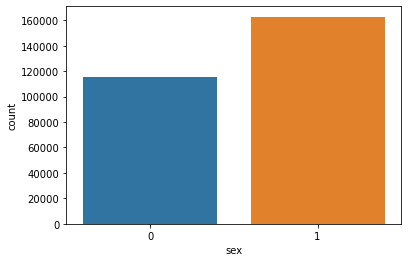

In [42]:
sns.countplot(balanced_okcupid["sex"])
plt.show()

# How many single meals compared to femails

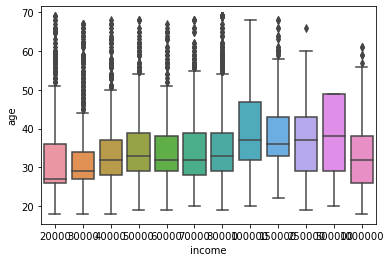

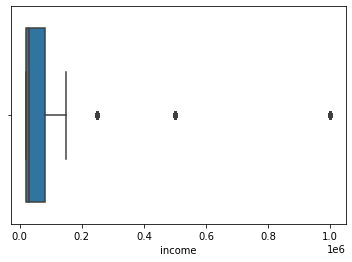

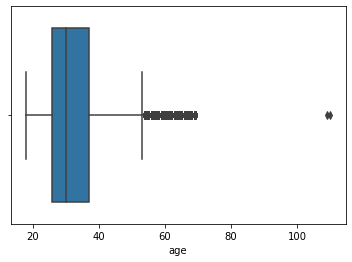

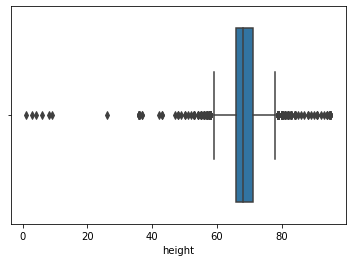

In [43]:

# Create the plot
filtered_income = balanced_okcupid[balanced_okcupid['income'] > 1000 & (balanced_okcupid['income'] < 1000000)]

sns.boxplot(x='income', y='age',  data=filtered_income)
plt.show()

sns.boxplot(x='income',  data=filtered_income)
plt.show()

sns.boxplot(x='age',  data=okcupid)
plt.show()


sns.boxplot(x='height',  data=okcupid)
plt.show()


In [44]:
balanced_okcupid['income'].value_counts()

-1          214216
 20000       27640
 100000       7508
 30000        4999
 80000        4278
 40000        4239
 50000        3621
 60000        3450
 70000        2935
 1000000      2565
 150000       2088
 250000        796
 500000        150
Name: income, dtype: int64

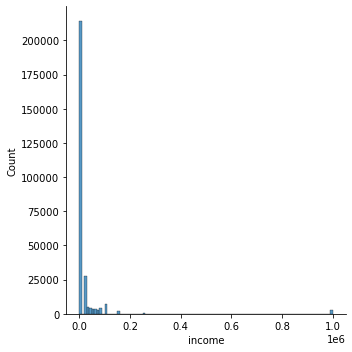

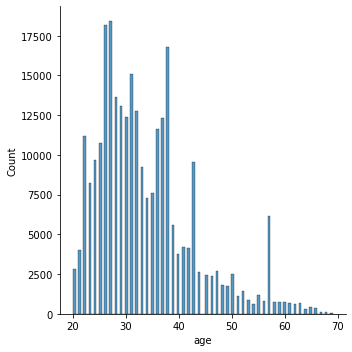

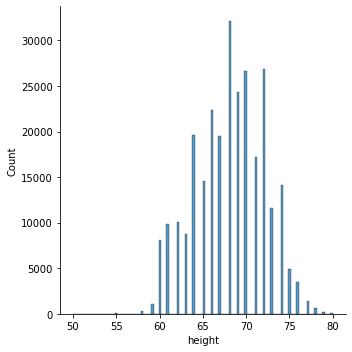

In [45]:
# historgram 

# X > age of population
# Y > status (single as a line history plot and then add other catagories)

# For histogram 2 substitute status for diet etc...

# histogram
sns.displot(balanced_okcupid.income, bins=100, kde=False)
plt.show()

# Filter the DataFrame to include only rows where height is between 50 and 80
filtered_age = balanced_okcupid[(balanced_okcupid['age'] >= 20) & (balanced_okcupid['age'] <= 70)]
# Create a histogram of the height column from the filtered data
sns.displot(filtered_age['age'], bins=100, kde=False)
plt.show()

# Filter the DataFrame to include only rows where height is between 50 and 80
filtered_height = balanced_okcupid[(balanced_okcupid['height'] >= 50) & (balanced_okcupid['height'] <= 80)]
# Create a histogram of the height column from the filtered data
sns.displot(filtered_height['height'], bins=100, kde=False)
plt.show()


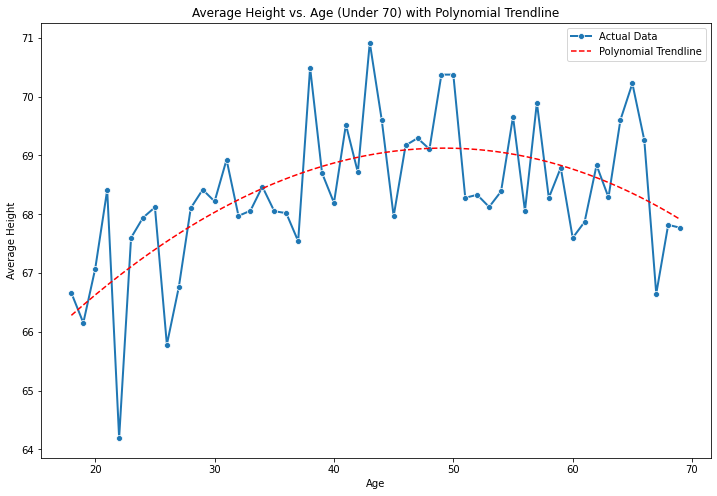

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data for ages under 70
filtered_data = balanced_okcupid[balanced_okcupid['age'] < 70]

# Calculate the average height per age group
avg_height_per_age = filtered_data.groupby('age')['height'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x=avg_height_per_age['age'], y=avg_height_per_age['height'], marker='o', linewidth=2, label="Actual Data")

# Fit a polynomial regression curve (degree 3 for better fit)
z = np.polyfit(avg_height_per_age['age'], avg_height_per_age['height'], 3)  # 3rd-degree polynomial fit
p = np.poly1d(z)

# Plot the fitted curve
ages_smooth = np.linspace(avg_height_per_age['age'].min(), avg_height_per_age['age'].max(), 300)  # Smooth X values
plt.plot(ages_smooth, p(ages_smooth), linestyle="dashed", color="red", label="Polynomial Trendline")

# Labels and title
plt.xlabel('Age')
plt.ylabel('Average Height')
plt.title('Average Height vs. Age (Under 70) with Polynomial Trendline')
plt.legend()

plt.show()


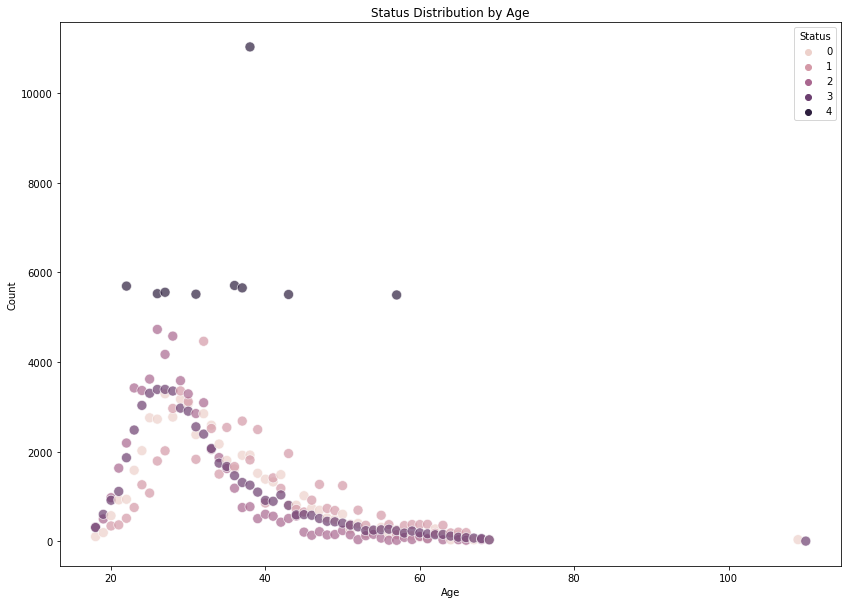

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Assuming 'balanced_okcupid' is your DataFrame containing 'age' and 'status' columns

# Count occurrences of 'status' per age
count_data = balanced_okcupid.groupby(['age', 'status']).size().reset_index(name='count')

plt.figure(figsize=(14, 10))

# Create scatterplot with value counts on the y-axis
sns.scatterplot(data=count_data, x='age', y='count', hue='status', alpha=0.7, s=100)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Status Distribution by Age')
plt.legend(title='Status')

plt.show()

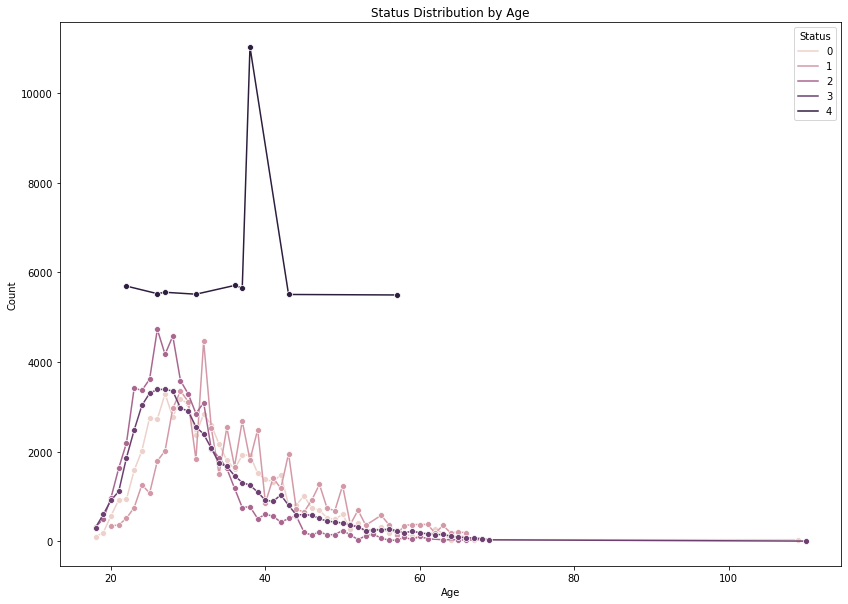

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count occurrences of 'status' per age
count_data = balanced_okcupid.groupby(['age', 'status']).size().reset_index(name='count')

plt.figure(figsize=(14, 10))

# Create line plot
sns.lineplot(data=count_data, x='age', y='count', hue='status', marker='o')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Status Distribution by Age')
plt.legend(title='Status')

plt.show()

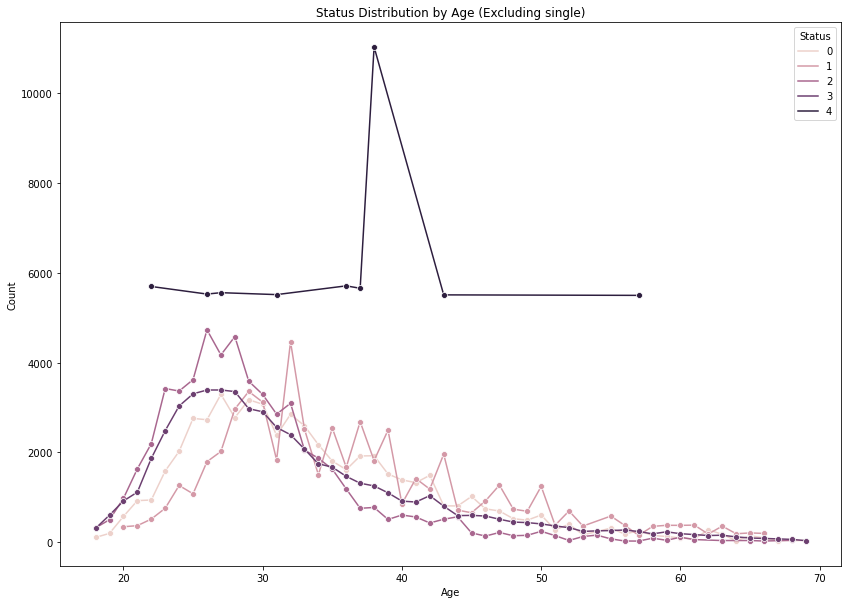

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count occurrences of 'status' per age
count_data = balanced_okcupid.groupby(['age', 'status']).size().reset_index(name='count')

# Filter out ages over 70
count_data = count_data[count_data['age'] <= 70]

# Remove statuses that appear only once
count_data = count_data[count_data['count'] > 1]

# Exclude 'single' category
count_data = count_data[count_data['status'] != "single"]

plt.figure(figsize=(14, 10))

# Create line plot
sns.lineplot(data=count_data, x='age', y='count', hue='status', marker='o')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Status Distribution by Age (Excluding single)')
plt.legend(title='Status')

plt.show()



C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


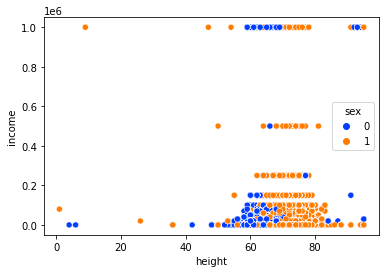

In [50]:
# Multivaliate analysis 
sns.scatterplot(balanced_okcupid.height, balanced_okcupid.income, hue = balanced_okcupid.sex, palette='bright')
plt.show()


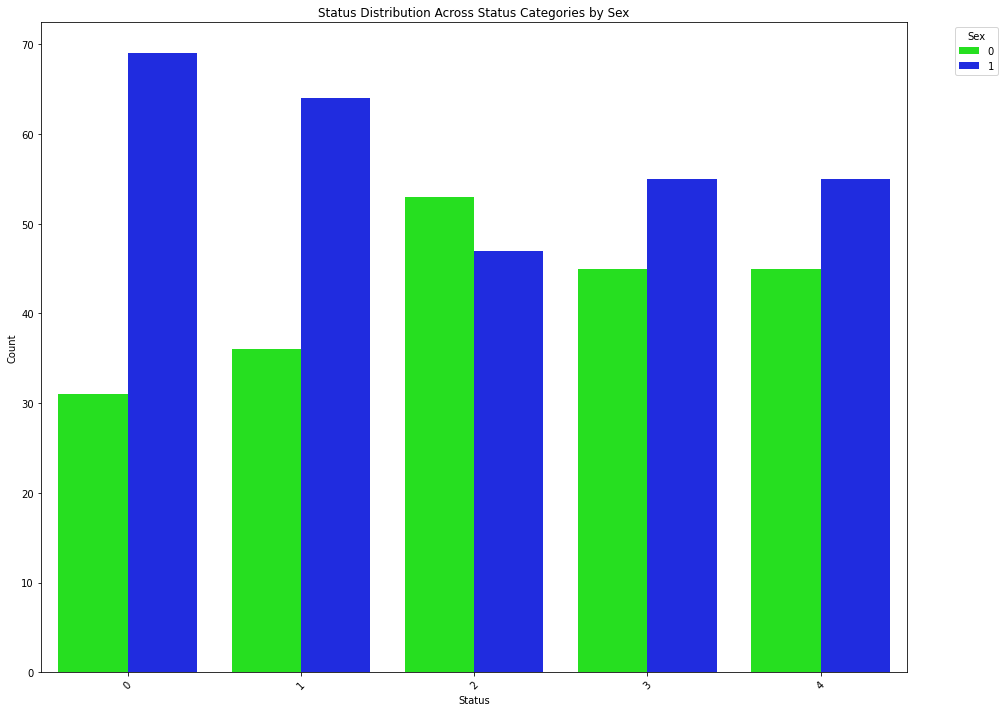

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stratified sampling: sample equal number from each status category
sampled_data = balanced_okcupid.groupby('status').apply(lambda x: x.sample(n=min(len(x), 100), random_state=1)).reset_index(drop=True)

# Plot the distribution of status within each status category, incorporating sex
plt.figure(figsize=(14, 10))
sns.countplot(data=sampled_data, x='status', hue='sex', palette='hsv')
plt.title('Status Distribution Across Status Categories by Sex')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
balanced_okcupid.shape

(278485, 35)

In [53]:
balanced_okcupid['status'].value_counts()

3    55697
2    55697
0    55697
1    55697
4    55697
Name: status, dtype: int64

In [54]:
print(balanced_okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278485 entries, 16954 to 50957
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      278485 non-null  int64  
 1   about_me                 278485 non-null  int32  
 2   employment               278485 non-null  int32  
 3   hobbies                  278485 non-null  int32  
 4   appearance               278485 non-null  int32  
 5   fouvourite_music_and_tv  278485 non-null  int32  
 6   likes                    278485 non-null  int32  
 7   aspirations              278485 non-null  int32  
 8   weekend                  278485 non-null  int32  
 9   fun_fact                 278485 non-null  int32  
 10  ideal_date               278485 non-null  int32  
 11  ethnicity                278485 non-null  int16  
 12  height                   278485 non-null  float64
 13  income                   278485 non-null  int64  
 14  j

# Data transformations for feature analysis

Data Scaling 


In [55]:
from sklearn.preprocessing import StandardScaler


# Select the columns to scale
columns_to_scale = ['age', 'ideal_date', 'ethnicity', 'height', 'income', 'job', 'location', 'offspring', 'orientation', 'pets', 'education_rating']

# Reset the index
okcupid_reset = balanced_okcupid.reset_index(drop=True)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(okcupid_reset[columns_to_scale])

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

okcupid_reset.head()

age  about_me  employment  hobbies  appearance  fouvourite_music_and_tv  \
0   47     54330       38950     3052       34465                     4827   
1   24     26229       28960    46419       42157                    42779   
2   27     19465       34422    13212       42157                    23110   
3   28     27339       11452    25123        6716                     6790   
4   20     36545       38478    23271       34163                    41265   

   likes  aspirations  weekend  fun_fact  ...  month  day  year  hour  minute  \
0   6364          445     3433     30827  ...      0    6     6     0       6   
1  47510        34684    40118     37620  ...      0    6     6     0       6   
2  28330        41497    15288     24670  ...      0    6     6     0       6   
3  34220        18179    32441      8203  ...      0    6     6     0       6   
4  25666         7179     9132     35634  ...      0    6     6     0       6   

   body_rating  diet_rating  drinks_rating  drugs_rating  education_rating  
0          2.0          0.0            1.0           0.0               0.0  
1          0.0          4.0            0.0           2.0               0.0  
2          4.0          1.0            0.0           1.0               0.0  
3          0.0          1.0            0.0           0.0               0.0  
4          2.0          1.0            1.0           1.0               9.0  

[5 rows x 35 columns]

# # Further EDA 

In [56]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

okcupid_reset.head(10)

age  about_me  employment  hobbies  appearance  fouvourite_music_and_tv  \
0   47     54330       38950     3052       34465                     4827   
1   24     26229       28960    46419       42157                    42779   
2   27     19465       34422    13212       42157                    23110   
3   28     27339       11452    25123        6716                     6790   
4   20     36545       38478    23271       34163                    41265   
5   25     41755       11439     4993       42157                    42543   
6   41     25477       19002    17851       38218                     7446   
7   50      5346       48797    22576       17261                    48105   
8   22      6853       32977    41601       38020                    42242   
9   34     45461        7251    30364       21140                    19594   

   likes  aspirations  weekend  fun_fact  ideal_date  ethnicity  height  \
0   6364          445     3433     30827       33012        140    71.0   
1  47510        34684    40118     37620       43573        215    65.0   
2  28330        41497    15288     24670        7718        215    64.0   
3  34220        18179    32441      8203       27320        216    69.0   
4  25666         7179     9132     35634       13365        216    77.0   
5  23882         6386    40118     38690       24788        215    70.0   
6   1359        35282    26587     30194       43573        206    70.0   
7  47510         1013     8195     37620       36262        100    70.0   
8  12407        32843     8912     24163       38792        140    68.0   
9  12244        33594    10589      8836       11694        206    69.0   

   income  job  location  offspring  orientation  pets  religion  sex  sign  \
0      -1   12       118          3            2    14        12    1    36   
1      -1   12       155          0            2    12         8    0    42   
2      -1   15       155          3            2    14        19    0     2   
3      -1    5       155          0            2    14        19    1     6   
4   20000   12       155          5            2    14        12    1    36   
5      -1   16       155          5            2    11         5    1     3   
6      -1   11       155          0            1     6        10    1    44   
7      -1    8       155          0            0    12         5    1    44   
8   20000   12       118          2            2    14         1    1    43   
9      -1   16       155          2            2    14        39    1    34   

   smokes  speaks  status  month  day  year  hour  minute  body_rating  \
0       0    7006       3      0    6     6     0       6          2.0   
1       0    2700       3      0    6     6     0       6          0.0   
2       0    1062       3      0    6     6     0       6          4.0   
3       0    4537       3      0    6     6     0       6          0.0   
4       2     738       3      0    6     6     0       6          2.0   
5       0       2       3      0    6     6     0       6          1.0   
6       0       1       3      0    0     0     0       0          7.0   
7       0       2       3      0    6     6     0       6          1.0   
8       0    7223       3      0    6     6     0       6          0.0   
9       0    2365       3      0    6     6     0       6          1.0   

   diet_rating  drinks_rating  drugs_rating  education_rating  
0          0.0            1.0           0.0               0.0  
1          4.0            0.0           2.0               0.0  
2          1.0            0.0           1.0               0.0  
3          1.0            0.0           0.0               0.0  
4          1.0            1.0           1.0               9.0  
5          4.0            0.0           1.0               0.0  
6          7.0            2.0           1.0               2.0  
7          1.0            2.0           1.0               0.0  
8          0.0            0.0           1.0              

In [57]:
print(okcupid_reset.columns)
#balanced_okcupid['age'].value_counts()
okcupid_reset['status'].value_counts()

Index(['age', 'about_me', 'employment', 'hobbies', 'appearance',
       'fouvourite_music_and_tv', 'likes', 'aspirations', 'weekend',
       'fun_fact', 'ideal_date', 'ethnicity', 'height', 'income', 'job',
       'location', 'offspring', 'orientation', 'pets', 'religion', 'sex',
       'sign', 'smokes', 'speaks', 'status', 'month', 'day', 'year', 'hour',
       'minute', 'body_rating', 'diet_rating', 'drinks_rating', 'drugs_rating',
       'education_rating'],
      dtype='object')


3    55697
2    55697
0    55697
1    55697
4    55697
Name: status, dtype: int64

# Data Visualisation

C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\distr

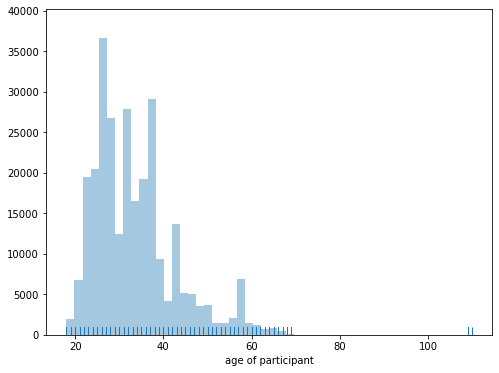

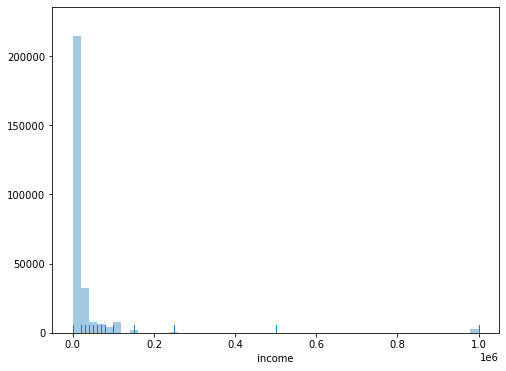

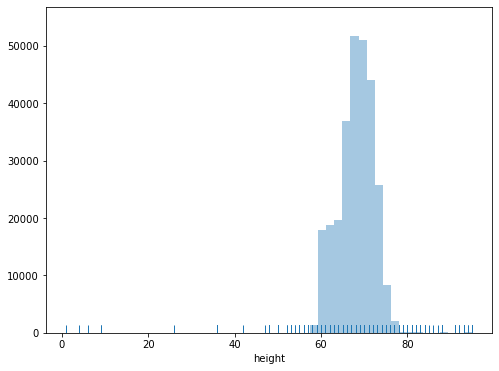

In [58]:
# Numerical colums

plt.figure(figsize=(8,6))
sns.distplot(okcupid_reset.age, rug = True, kde=False)
plt.xlabel("age of participant");

plt.figure(figsize=(8,6))
sns.distplot(okcupid_reset.income, rug = True, kde=False)
plt.xlabel("income");

plt.figure(figsize=(8,6))
sns.distplot(okcupid_reset.height, rug = True, kde=False)
plt.xlabel("height");

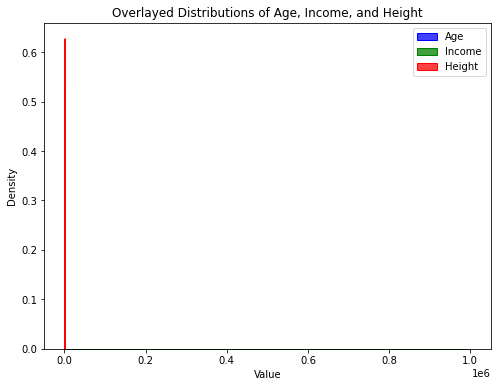

In [59]:
plt.figure(figsize=(8, 6))

# Overlayed distribution plots
sns.histplot(okcupid_reset.age, color='blue', label='Age', kde=False, element='step', stat='density')
sns.histplot(okcupid_reset.income, color='green', label='Income', kde=False, element='step', stat='density')
sns.histplot(okcupid_reset.height, color='red', label='Height', kde=False, element='step', stat='density')

plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.title("Overlayed Distributions of Age, Income, and Height")
plt.show()


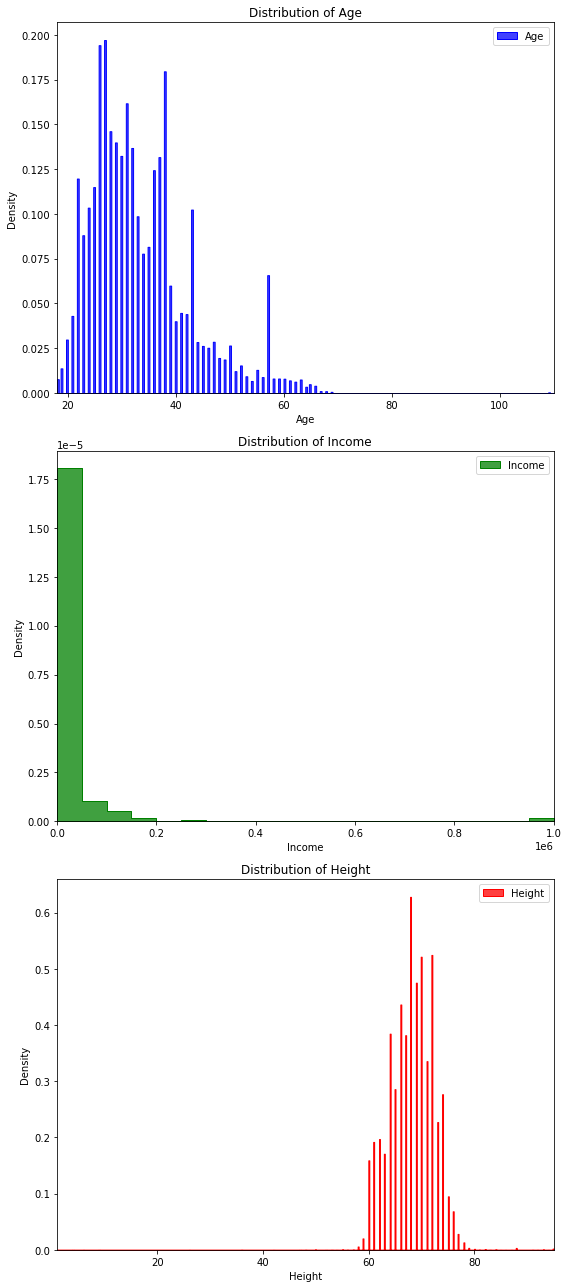

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Plot for Age
sns.histplot(okcupid_reset.age, color='blue', label='Age', kde=False, element='step', stat='density', ax=axes[0])
axes[0].set_xlim(min(okcupid_reset.age), max(okcupid_reset.age))  # Adjust the x-axis range for age
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")
axes[0].legend()

# Plot for Income
sns.histplot(okcupid_reset.income, color='green', label='Income', kde=False, element='step', stat='density', ax=axes[1])
axes[1].set_xlim(min(okcupid_reset.income), max(okcupid_reset.income))  # Adjust the x-axis range for income
axes[1].set_title("Distribution of Income")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("Density")
axes[1].legend()

# Plot for Height
sns.histplot(okcupid_reset.height, color='red', label='Height', kde=False, element='step', stat='density', ax=axes[2])
axes[2].set_xlim(min(okcupid_reset.height), max(okcupid_reset.height))  # Adjust the x-axis range for height
axes[2].set_title("Distribution of Height")
axes[2].set_xlabel("Height")
axes[2].set_ylabel("Density")
axes[2].legend()

plt.tight_layout()
plt.show()


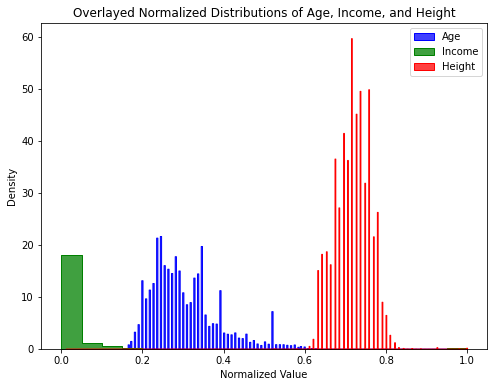

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize each variable so their densities are comparable
normalized_age = okcupid_reset.age / max(okcupid_reset.age)
normalized_income = okcupid_reset.income / max(okcupid_reset.income)
normalized_height = okcupid_reset.height / max(okcupid_reset.height)

plt.figure(figsize=(8, 6))

# Overlayed normalized distribution plots
sns.histplot(normalized_age, color='blue', label='Age', kde=False, element='step', stat='density')
sns.histplot(normalized_income, color='green', label='Income', kde=False, element='step', stat='density')
sns.histplot(normalized_height, color='red', label='Height', kde=False, element='step', stat='density')

plt.xlabel("Normalized Value")
plt.ylabel("Density")
plt.legend()
plt.title("Overlayed Normalized Distributions of Age, Income, and Height")
plt.show()


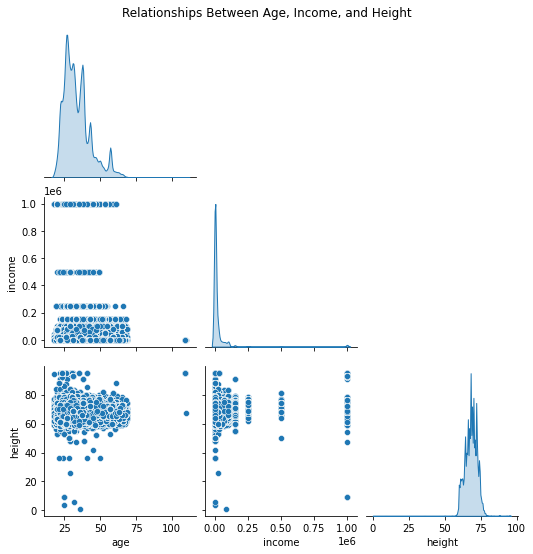

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to show relationships between age, income, and height
sns.pairplot(okcupid_reset, vars=['age', 'income', 'height'], diag_kind='kde', corner=True)

plt.suptitle("Relationships Between Age, Income, and Height", y=1.02)
plt.show()


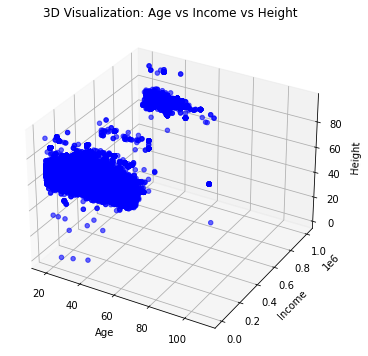

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(okcupid_reset.age, okcupid_reset.income, okcupid_reset.height, alpha=0.6, c='blue')

ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Height")
ax.set_title("3D Visualization: Age vs Income vs Height")
plt.show()


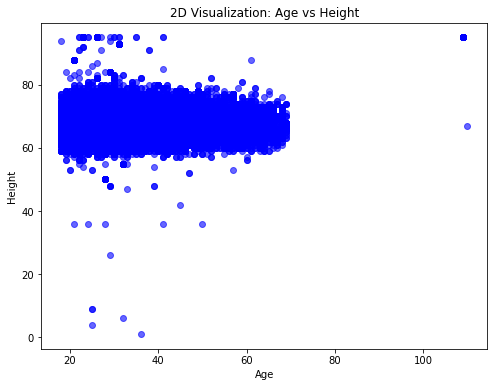

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Scatter plot
ax.scatter(okcupid_reset.age, okcupid_reset.height, alpha=0.6, c='blue')

ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_title("2D Visualization: Age vs Height")
plt.show()


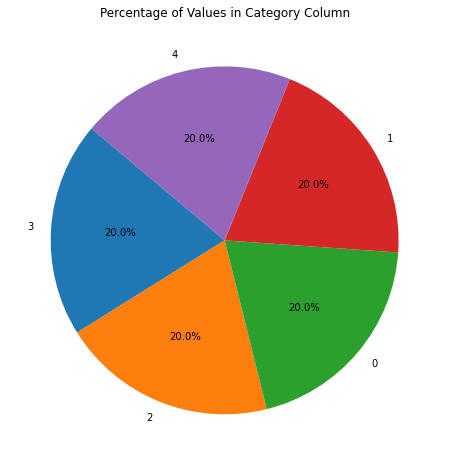

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each value
value_counts = okcupid_reset['status'].value_counts()

# Calculate percentages
percentages = (value_counts / len(okcupid_reset)) * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Values in Category Column')
plt.show()


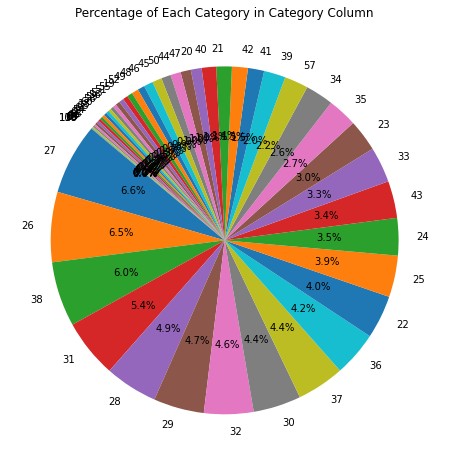

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each value
value_counts = okcupid_reset['age'].value_counts()

# Calculate percentages
percentages = (value_counts / value_counts.sum()) * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Category in Category Column')
plt.show()


In [67]:
okcupid_reset.sex.value_counts(normalize=True)

1    0.584595
0    0.415405
Name: sex, dtype: float64

# Usful relationships

  age                                    
 1   ideal_date                              
 2   ethnicity                               
 3   height                                
 4   income                                  
 5   job                                      
 6   location                                
 7   offspring                                
 8   orientation                              
 9   pets                                     
 10  religion                                 
 11  sex                                      
 12  sign                                     
 13  smokes                                   
 14  speaks                                  
 15  status                                   
 16  month                                    
 17  day                                      
 18  year                                     
 19  hour                                     
 20  minute                                  
 21  body_rating                           
 22  diet_rating                      
 23  drinks_rating                     
 24  drugs_rating                       
 25  education_rating                        
 26  about_me_cluster_labels                   
 27  employment_column_labels                  
 28  hobbies_cluster_labels                    
 29  appearance_cluster_labels                 
 30  fouvourite_music_and_tv_cluster_labels    
 31  likes_cluster_labels                    
 32  aspirations_cluster_labels                
 33  weekend_cluster_labels                   -    
 34  fun_fact_cluster_labels                 

# The Machine Learning Model 

'''
There are three possible analysis we can perform: 
    
    - Regression for age vs heigh 
    - Logistic Regress for sex
    - A classification model for status
'''

## Linear Regression Model 

In [68]:
from sklearn import linear_model

okcupid_reset[['age', 'height']].head()



age  height
0   47    71.0
1   24    65.0
2   27    64.0
3   28    69.0
4   20    77.0

In [69]:
 average_height= okcupid_reset.groupby('sex').height.mean().reset_index()
print(average_height)

   sex     height
0    0  64.871927
1    1  70.435360


In [70]:
X = okcupid_reset["age"]

X = X.values.reshape(-1, 1)


In [71]:
Y = okcupid_reset["height"]

Y = Y.values.reshape(-1, 1)


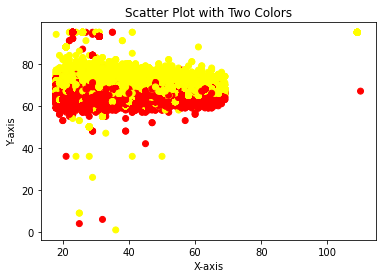

In [72]:
# Create scatter plot
plt.scatter(X, Y, c=okcupid_reset['sex'], cmap=plt.get_cmap("autumn"))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Two Colors")
plt.show()


In [73]:
# Create and Fit a Linear Regression Model

okcupid_linear_regression_model = linear_model.LinearRegression() #The LinearRegression class is from the linear_model module.

okcupid_linear_regression_model.fit(X,Y)

# Print the slope (coefficient)
print(okcupid_linear_regression_model.coef_[0])


[0.09533812]


In [74]:
# Assuming X_new is the new data you want to predict on
# X_new should be a 2D array, similar to X used in fitting

# Example: Predicting on the same data
y_predict = okcupid_linear_regression_model.predict(X)

# Print predictions
print(y_predict)


[[69.40882146]
 [67.21604469]
 [67.50205905]
 ...
 [67.50205905]
 [67.40672093]
 [69.02746898]]


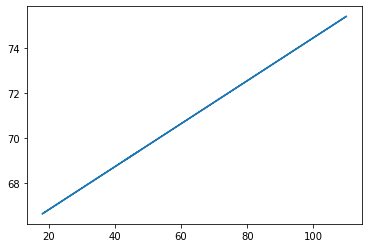

In [75]:
plt.plot(X, y_predict)
plt.show()

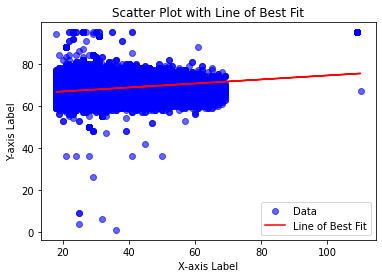

In [76]:
# Scatter plot of the original data
plt.scatter(X, Y, alpha=0.6, c='blue', label='Data')

# Line of best fit
y_predict = okcupid_linear_regression_model.predict(X)
plt.plot(X, y_predict, color='red', label='Line of Best Fit')

# Add labels and title
plt.xlabel('X-axis Label')  # Replace with actual label
plt.ylabel('Y-axis Label')  # Replace with actual label
plt.title('Scatter Plot with Line of Best Fit')

# Add a legend
plt.legend()

# Show the plot
plt.show()


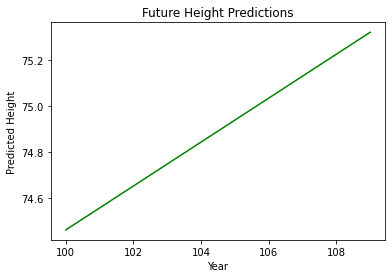

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for future years
start_age = 100  # Example start year
end_age = 110    # Example end year

# Create and reshape X_future
X_future = np.array(range(start_age, end_age)).reshape(-1, 1)

# Predict future heights
future_predict = okcupid_linear_regression_model.predict(X_future)

# Plot future predictions
plt.plot(X_future, future_predict, color='green', label='Future Predictions')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Predicted Height')
plt.title('Future Height Predictions')

# Show the plot
plt.show()

######





In [78]:
import numpy as np

# Given age for which you want to predict the height
age_to_predict = 100  

# Prepare the age data for prediction
age_array = np.array([[age_to_predict]])  # Reshape to 2D array

# Predict the height for the given age
predicted_height = okcupid_linear_regression_model.predict(age_array)

# Print the predicted height
print(f"Predicted height for age {age_to_predict}: {predicted_height[0]}")


Predicted height for age 100: [74.46174182]


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X and Y are your data
y_pred = okcupid_linear_regression_model.predict(X)

# Calculate MAE
mae = mean_absolute_error(Y, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate MSE
mse = mean_squared_error(Y, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(Y, y_pred)
print(f"R-squared: {r2}") # an r^2 result close to zero show the result do not fit the model very well
                          # This may be because the data is bias and does no accurate reflect the true gradient

Mean Absolute Error: 3.2041206098807318
Mean Squared Error: 16.09539576308616
R-squared: 0.046695574014038344


# Multiple Linear Regression

Multiple Linear Regression can be used here as there are two independent numerical variable, age and height, with incomee being the possible dependent variable. 


In [80]:
# after removing outliers 

# To remove extreme values from a given column that do not contribute to the general pattern of the data, 
# you can use statistical methods to identify and filter out these outliers. Here are some common approaches:

# Z-Score Method: Calculate the z-score for each data point and remove those with a z-score above a certain threshold (commonly 3).

# Interquartile Range (IQR) Method: Calculate the IQR and remove data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

# Percentile Method: Remove data points below a certain percentile (e.g., 1st percentile) or above a certain percentile (e.g., 
# 99th percentile).


import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'height' and 'age' are the columns to filter
# Calculate IQR for 'height'
Q1_height = okcupid_reset['height'].quantile(0.25)
Q3_height = okcupid_reset['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

# Calculate IQR for 'age'
Q1_age = okcupid_reset['age'].quantile(0.25)
Q3_age = okcupid_reset['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Filter out outliers for 'height' and 'age'
df_filtered = okcupid_reset[
    (okcupid_reset['height'] >= (Q1_height - 1.5 * IQR_height)) & 
    (okcupid_reset['height'] <= (Q3_height + 1.5 * IQR_height)) &
    (okcupid_reset['age'] >= (Q1_age - 1.5 * IQR_age)) & 
    (okcupid_reset['age'] <= (Q3_age + 1.5 * IQR_age))
]

# Create x and y from the filtered DataFrame
x = df_filtered[['height', 'age']]
y = df_filtered[['income']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211297, 2)
(52825, 2)
(211297, 1)
(52825, 1)


In [81]:
'''

# Spliting the dataset
from sklearn.model_selection import train_test_split

# Create a DataFrame x that selects the following columns from the main df DataFrame:
x = okcupid[['height', 'age']]

y = okcupid[['income']]

# Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set and generate:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

'''

"\n\n# Spliting the dataset\nfrom sklearn.model_selection import train_test_split\n\n# Create a DataFrame x that selects the following columns from the main df DataFrame:\nx = okcupid[['height', 'age']]\n\ny = okcupid[['income']]\n\n# Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set and generate:\nx_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)\n\nprint(x_train.shape)\nprint(x_test.shape)\n\nprint(y_train.shape)\nprint(y_test.shape)\n\n"

In [82]:
# Now we have the training set and the test set, let’s use scikit-learn to build the linear regression model!

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(x_train, y_train) 
# finds the coefficients and the intercept value

y_predicted = mlr.predict(x_test)
# takes values calculated by `.fit()` and the `x` values, plugs them into the multiple linear regression equation, and calculates the predicted y values. 



In [83]:
# Print the first predicted rent value
print("Predicted income: $%.2f" % y_predicted[0])




Predicted income: $19156.34


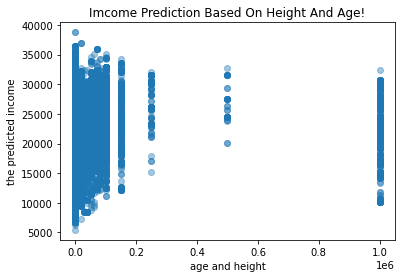

In [84]:
# a 2D scatterplot to see how the independent affect the dependent variable using pyplot module: 

# Create a scatter plot
plt.scatter(y_test, y_predicted, alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("age and height")
plt.ylabel("the predicted income")

# Create a title
plt.title("Imcome Prediction Based On Height And Age!")

# Show the plot
plt.show()



In [85]:
# Even thought two independent variable have been used it is possible to use any number
# The .fit() method gives the model two variables that are useful to us:

#      .coef_, which contains the coefficients
#      .intercept_, which contains the intercept
#       After performing multiple linear regression, you can print the coefficients using .coef_.

#       Coefficients are most helpful in determining which independent variable carries more weight. 
#       For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, 
#       with the former impacting prices negatively and latter positively

print(mlr.coef_)

print(mlr.intercept_)


[[1197.2464312   207.14153291]]
[-67157.48417325]


In [86]:
# Assessing the model accracy 
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))


Train score:
0.0028976800664168856
Test score:
0.0029909244295417414


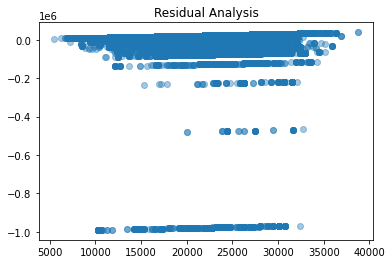

In [87]:
# graph a scatter plot of residuals vs. predicted_y values

residuals = y_predicted - y_test

plt.scatter(y_predicted, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()


# Logistic Regression 

In [88]:
 # The sex column can be used as a target variable for binary classification. 

In [89]:
okcupid_reset['sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 278485 entries, 0 to 278484
Series name: sex
Non-Null Count   Dtype
--------------   -----
278485 non-null  int8 
dtypes: int8(1)
memory usage: 272.1 KB


In [90]:
males = okcupid_reset['sex'].sum()
print("there are:", males, "males")
print("and there are", 59946 - males, "females")

there are: 162801 males
and there are -102855 females


In [91]:
okcupid_reset['sex'].describe()

'''
The summary statistics for the `sex` column provide insights into the distribution of the data in this column:

1. **Count (59946)**: There are 59,946 entries in the `sex` column.

2. **Mean (0.597688)**: The mean value of approximately 0.598 suggests that about 59.8% of the entries are 1. 
    This likely indicates a binary encoding where one sex is represented by 1 and the other by 0.

3. **Standard Deviation (0.490368)**: This measures the variability in the `sex` values. 
    A standard deviation close to 0.5 is typical for binary data.

4. **Minimum (0)**: The smallest value is 0, representing one category of sex.

5. **25th Percentile (0)**: 25% of the entries are in the category represented by 0.

6. **50th Percentile (1)**: The median value is 1, indicating that at least half of the entries are in the category represented by 1.

7. **75th Percentile (1)**: 75% of the entries are in the category represented by 1.

8. **Maximum (1)**: The largest value is 1, representing the other category of sex.

These statistics suggest that the dataset is slightly imbalanced, with more entries in the category represented by 1.

'''

'\nThe summary statistics for the `sex` column provide insights into the distribution of the data in this column:\n\n1. **Count (59946)**: There are 59,946 entries in the `sex` column.\n\n2. **Mean (0.597688)**: The mean value of approximately 0.598 suggests that about 59.8% of the entries are 1. \n    This likely indicates a binary encoding where one sex is represented by 1 and the other by 0.\n\n3. **Standard Deviation (0.490368)**: This measures the variability in the `sex` values. \n    A standard deviation close to 0.5 is typical for binary data.\n\n4. **Minimum (0)**: The smallest value is 0, representing one category of sex.\n\n5. **25th Percentile (0)**: 25% of the entries are in the category represented by 0.\n\n6. **50th Percentile (1)**: The median value is 1, indicating that at least half of the entries are in the category represented by 1.\n\n7. **75th Percentile (1)**: 75% of the entries are in the category represented by 1.\n\n8. **Maximum (1)**: The largest value is 1, 

In [92]:
# creating new colums to filter data ( for information purposes only)

# Create isPayment field
#transactions['isPayment'] = transactions['type'].apply(lambda x: 1 if x in ['PAYMENT', 'DEBIT'] else 0)

# Create isMovement field
#transactions['isMovement'] = transactions['type'].apply(lambda x: 1 if x in ['CASH_OUT', 'TRANSFER'] else 0)

# Create accountDiff field
#transactions['accountDiff'] = abs(transactions['oldbalanceOrg'] - transactions['oldbalanceDest'])

#- transactions['type'] create a new column
#- lambda creates the new column
#- it checks if the x is assigned a valuse of 1 corresponding to cash out or a elase a 0 corresponing to transfer.

In [93]:
# Create features and label variables

features = okcupid_reset[['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']]

label = okcupid_reset['sex']

In [94]:
# Split the data into training and test sets using sklearn‘s train_test_split() method. 
# We’ll use the training set to train the model and the test set to evaluate the model. Use a test_size value of 0.3.

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=6)

In [95]:
# Normalize the features variables
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [96]:
# Fit the model to the training data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [97]:
# Score the model on the training data
train_score = model.score(x_train_scaled, y_train)
print(f"Training accuracy: {train_score}")

# 85% is quite good but adding or removing feature may improve this

Training accuracy: 0.8696156233488425


In [98]:
# Print the model coefficients
print("Model coefficients:", model.coef_)

'''
In the context of a logistic regression model, the coefficients represent the relationship between each feature and the log-odds of the outcome. Here's what they mean:

1. **Magnitude**: The size of the coefficient indicates the strength of the relationship. A larger absolute value suggests a stronger influence on the outcome.

2. **Sign**: 
   - A positive coefficient means that as the feature value increases, the log-odds of the outcome (e.g., fraud) also increase, making the event more likely.
   - A negative coefficient means that as the feature value increases, the log-odds of the outcome decrease, making the event less likely.

3. **Interpretation**: 
   - For a feature with a positive coefficient, an increase in that feature's value is associated with an increase in the likelihood of the outcome.
   - For a feature with a negative coefficient, an increase in that feature's value is associated with a decrease in the likelihood of the outcome.

In logistic regression, the coefficients are used to calculate the probability of the outcome using the logistic function. They help in understanding which features are most influential in predicting the outcome.

The model coefficients from a logistic regression model indicate the influence of each feature on the log-odds of the outcome. Here's how to interpret them:

1. **Negative Coefficients**: 
   - Features with negative coefficients (e.g., `-0.04780077`, `-0.37817339`, `-0.09492182`, `-0.5075958`) suggest that as these feature values increase, the likelihood of the outcome (e.g., fraud) decreases.

2. **Positive Coefficients**: 
   - Features with positive coefficients (e.g., `0.08927373`, `0.07409869`, `0.12983127`, `2.70766712`, `0.21612464`) suggest that as these feature values increase, the likelihood of the outcome increases.

3. **Magnitude**:
   - The magnitude of the coefficient indicates the strength of the relationship. For example, `2.70766712` has a strong positive influence, suggesting this feature significantly increases the likelihood of the outcome.

Each coefficient corresponds to a feature in the model. To fully understand the impact, you need to know which feature each coefficient is associated with. The feature with the largest absolute coefficient has the most significant impact on the prediction.
'''

Model coefficients: [[ 0.39633879 -0.17950493 -0.53657333  0.02964784  0.07899654  0.14299568
  -0.67262383  2.85197491 -0.02231994]]


"\nIn the context of a logistic regression model, the coefficients represent the relationship between each feature and the log-odds of the outcome. Here's what they mean:\n\n1. **Magnitude**: The size of the coefficient indicates the strength of the relationship. A larger absolute value suggests a stronger influence on the outcome.\n\n2. **Sign**: \n   - A positive coefficient means that as the feature value increases, the log-odds of the outcome (e.g., fraud) also increase, making the event more likely.\n   - A negative coefficient means that as the feature value increases, the log-odds of the outcome decrease, making the event less likely.\n\n3. **Interpretation**: \n   - For a feature with a positive coefficient, an increase in that feature's value is associated with an increase in the likelihood of the outcome.\n   - For a feature with a negative coefficient, an increase in that feature's value is associated with a decrease in the likelihood of the outcome.\n\nIn logistic regressio

# Logistic Regression 2

In [99]:
okcupid_reset['sex'].value_counts() # shows the distribution of sex classes.

1    162801
0    115684
Name: sex, dtype: int64

In [100]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

feature_cols = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']

X = pd.get_dummies(okcupid_reset[feature_cols], drop_first=True)

#print(X)

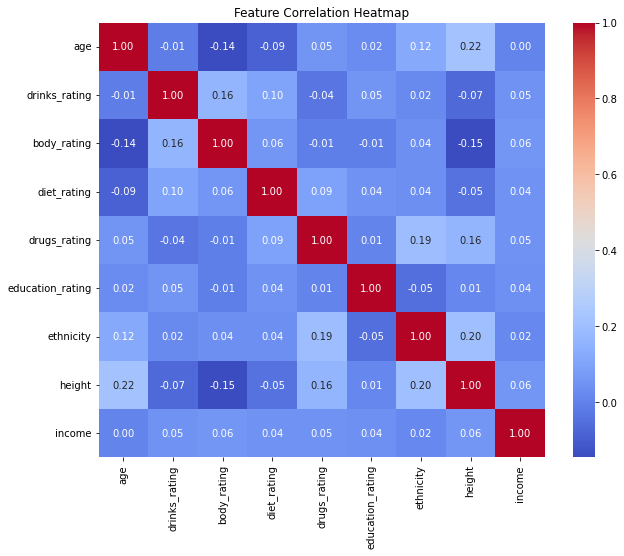

In [101]:
# Create a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [102]:
#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k

#y = okcupid['sex']     #.apply(lambda x: 1 if x == '>50K' else 0)

y = okcupid_reset['sex'].astype(int)

In [103]:
# 5a. Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [104]:
# Fit LR model with sklearn on train set, and predicting on the test set

log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [105]:
# Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:', log_reg.intercept_)
print('Model Parameters, Coeff:', log_reg.coef_)

Model Parameters, Intercept: [-43.05084215]
Model Parameters, Coeff: [[ 4.01098233e-02 -1.55685468e-01 -2.00839671e-01  1.15905407e-02
   1.04677998e-01  2.88513416e-02 -9.17962139e-03  6.50983202e-01
  -1.56894037e-07]]


In [106]:
# Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.

print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
print('Accuracy Score on test set:')
print(accuracy_score(y_test, y_pred))


Confusion Matrix on test set:
[[19196  4094]
 [ 3267 29140]]
Accuracy Score on test set:
0.8678384832217175


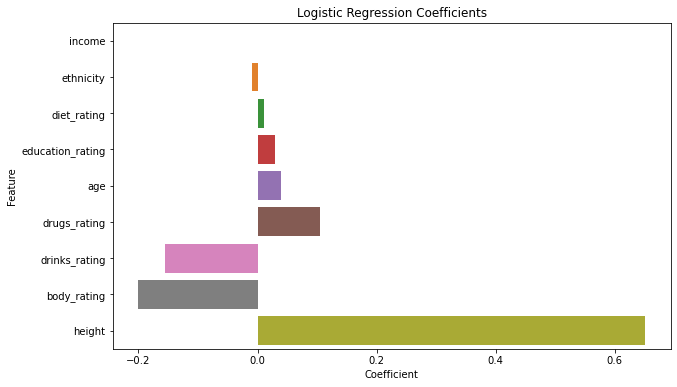

In [107]:
# Create a DataFrame of the model coefficients and variable names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort the coefficients by their absolute values
coefficients = coefficients.reindex(coefficients.Coefficient.abs().sort_values().index)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.show()


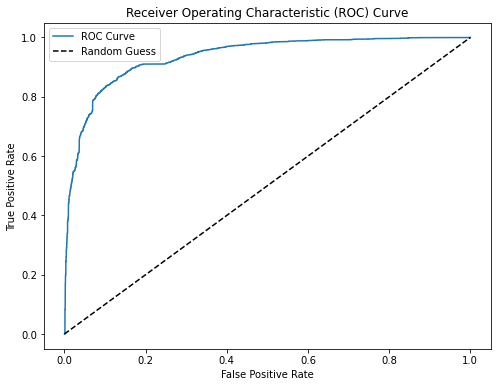

AUC: 0.93


In [108]:
# Calculate the predicted probabilities
y_pred_prob = log_reg.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate and print the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.2f}')


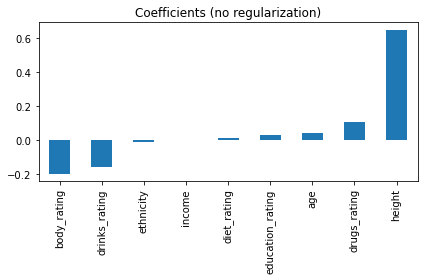

<Figure size 432x288 with 0 Axes>

In [109]:
predictors = features.columns
coefficients = log_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()


In [110]:
'''
You’re now ready to evaluate this classifier! In the case of linear regression, we evaluated our models using mean-squared-error. 
For classifiers, it is important that the classifier not only has high accuracy, but also high precision and recall, i.e., a low false
positive and false negative rate.

A metric known as f1 score, which is the weighted mean of precision and recall, captures the performance of a classifier holistically.
It takes values between 0 and 1 and the closer it is to 1, the better the classifier. Use f1_score() to calculate the f1 score for the
training and test data.

'''

from sklearn.metrics import f1_score

y_pred_test = log_reg.predict(x_test)
y_pred_train = log_reg.predict(x_train)
print('Training Score', f1_score(y_train, y_pred_train))
print('Testing Score', f1_score(y_test, y_pred_test))


Training Score 0.8889006754990472
Testing Score 0.8878597218202038


In [111]:
# implimentation of L2 regularisation 

clf_default = LogisticRegression() # there are no added parameters
clf_default.fit(x_train, y_train)


C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
# obtaining the F1 score

y_pred_train = clf_default.predict(x_train)
y_pred_test = clf_default.predict(x_test)

print('Ridge-regularized Training Score', f1_score(y_train, y_pred_train))
print('Ridge-regularized Testing Score', f1_score(y_test, y_pred_test))


Ridge-regularized Training Score 0.7664464194953089
Ridge-regularized Testing Score 0.7667650547571101


In [113]:
'''

The scores remain the same! Does this mean that regularization did nothing? Indeed! This means that the constraint boundary for the 
regularization we performed is large enough to hold the original loss function minimum, thus rendering our model the same as the
unregularized one.

How can we tune up the regularization? Recall that C is the inverse of the regularization strength (alpha), meaning that smaller values
of C correspond to more regularization. The scikit-learn default for C is 1; therefore, in order to increase the amount of 
regularization, we need to consider values of C that are less than 1. But how far do we need to go? Let’s try a coarse-grained search 
before performing a fine-grained one.

Define an array, C_array that takes the values C_array = [0.0001, 0.001, 0.01, 0.1, 1]. Get an array each for the training and test 
scores corresponding to these values of C.

'''

training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for x in C_array:
    clf = LogisticRegression(C = x )
    clf.fit(x_train, y_train)
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))


C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

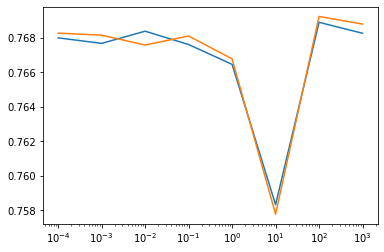

<Figure size 432x288 with 0 Axes>

In [114]:
plt.plot(C_array,training_array)
plt.plot(C_array,test_array)
plt.xscale('log')
plt.show()
plt.clf()

# The optimal C seems to be somewhere around 1.0 so extending the search window between 1.0 and 2.0 may be usful

# Hyperparameter Tuning for L2 Regularization

In [115]:
# Making a parameter grid for GridSearchCV
# Let’s first get setup with the right inputs for this. Use np.logspace() to obtain 100 values between 10^(-2) and 10^(1) and define 
# a dictionary of C values named tuning_C that can function as an input to GridSearchCV‘s parameter grid.

C_array  = np.logspace(0.1, 0.25, 20)
#Making a dict to enter as an input to param_grid
tuning_C = {'C':C_array}


In [116]:
# Implementing GridSearchCV with l2 penalty
# Define a grid search model on the parameter grid defined above for a logistic regression model with ridge regularization. Set the 
# scoring metric to ‘f1’ and the number of folds to 5. Fit this to the training data.

from sklearn.model_selection import GridSearchCV

clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, param_grid = tuning_C, scoring = 'f1', cv = 5)
gs.fit(x_train,y_train) 


C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.25892541, 1.28201981, 1.30553787, 1.32948735, 1.35387618,
       1.37871241, 1.40400425, 1.42976005, 1.45598833, 1.48269776,
       1.50989716, 1.53759552, 1.565802  , 1.5945259 , 1.62377674,
       1.65356417, 1.68389803, 1.71478836, 1.74624535, 1.77827941])},
             scoring='f1')

In [117]:
# Optimal C value and the score corresponding to it

print(gs.best_params_, gs.best_score_)

from sklearn.metrics import f1_score




{'C': 1.7782794100389228} 0.7644414178076847


In [118]:
okcupid_reset['sex'].value_counts()

1    162801
0    115684
Name: sex, dtype: int64

In [119]:
# Validating the "best classifier"

'''

The score you got above reflects the mean f1-score on the 5 folds corresponding to the best classifier. Notice however that we haven’t 
yet used the test data, X_test, y_test from our original train-test split! This was done with good reason: the original test data can 
now be used as our validation dataset to validate whether our “best classifier” is doing as well as we’d like it to on essentially
unknown data.

Define a new classifier clf_best_ridge that corresponds to the best C value you obtained in the previous task. Fit it to the training 
data and obtain the f1_score on the test data to validate the model.

from sklearn.linear_model import LogisticRegressionCV

'''

clf_best = LogisticRegression(C = gs.best_params_['C'])
clf_best.fit(x_train,y_train)
y_pred_best = clf_best.predict(x_test)
print(f1_score(y_test,y_pred_best))


0.7678193753948417


C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Splitting the data 

In [138]:
print(okcupid_reset['status'])

0         3
1         3
2         3
3         3
4         3
         ..
278480    4
278481    4
278482    4
278483    4
278484    4
Name: status, Length: 278485, dtype: int8


In [139]:
print(okcupid_reset['status'].value_counts())

3    55697
2    55697
0    55697
1    55697
4    55697
Name: status, dtype: int64


In [140]:
# Create a new target variable

y_status = okcupid_reset['status'] 

In [141]:
training_data, validation_data, training_labels, validation_labels = train_test_split(
    X, 
    y_status, 
    test_size=0.2, 
    random_state=1
)


print(len(training_data))

222788


# K Nearest Neighbors

In this project, we will be using several Python libraries to make a K-Nearest Neighbor classifier that is trained to predict relationships status

In [142]:
# Fit KNN model with sklearn on train set, and predicting on the test set
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(training_data, training_labels)
y_pred = KNN.predict(validation_data)

In [143]:
# print the accuracy of the model

print(KNN.score(validation_data, validation_labels))


0.9155609817404887


In [144]:
from sklearn.metrics import classification_report
print(classification_report(validation_labels, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     11098
           1       0.97      1.00      0.98     10894
           2       0.83      1.00      0.91     11259
           3       1.00      0.59      0.74     11266
           4       1.00      1.00      1.00     11180

    accuracy                           0.92     55697
   macro avg       0.93      0.92      0.91     55697
weighted avg       0.93      0.92      0.91     55697



In [145]:
print(set(y_pred))

{0, 1, 2, 3, 4}


In [146]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 13): # after thirteen iterations the accuracy of the model stops increasing
    # Create classifier with current k
    KNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train classifier
    KNN.fit(training_data, training_labels)
    
    # Report accuracy
    accuracy = KNN.score(validation_data, validation_labels)
    print(f'Accuracy for k={k}: {accuracy}')


Accuracy for k=1: 0.983930911898307
Accuracy for k=2: 0.9680413666804316
Accuracy for k=3: 0.9692622582903927
Accuracy for k=4: 0.9551860961990771
Accuracy for k=5: 0.9562813077903657
Accuracy for k=6: 0.9431567229832846
Accuracy for k=7: 0.943767168788265
Accuracy for k=8: 0.9326175557031797
Accuracy for k=9: 0.9335870872757959
Accuracy for k=10: 0.9234967772052355
Accuracy for k=11: 0.9241790401637431
Accuracy for k=12: 0.9151121245309443


# Decision Trees

In [148]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth

training_data, validation_data, training_labels, validation_labels

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(training_data, training_labels)
    acc_depth.append(dt.score(validation_data, validation_labels))

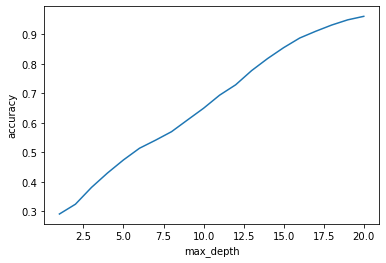

In [149]:
#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [150]:
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 96.1% at depth 20


Confusion Matrix:
[[10843    74   109    72     0]
 [    0 10894     0     0     0]
 [  175    64 10910   110     0]
 [  664   121   800  9680     1]
 [    0     0     0     0 11180]]


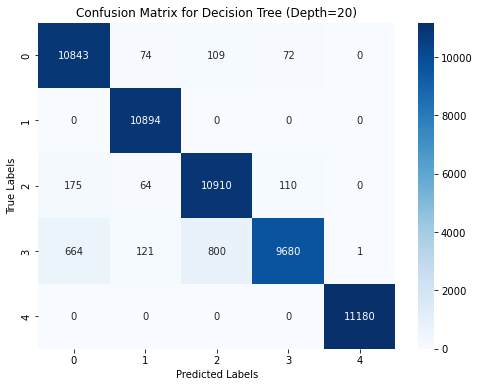

In [152]:
# Make predictions on the test data
predictions = dt.predict(validation_data)

# Generate the confusion matrix
conf_matrix = confusion_matrix(validation_labels, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Decision Tree (Depth={best_depth})')
plt.show()


In [153]:
# Calculate accuracy
# Accuracy is calculated by finding the total number of correctly classified predictions (true positives and true negatives) 
# and dividing by the total number of predictions.

accuracy = accuracy_score(validation_labels, predictions)

print(f'Accuracy for Decision Tree (Depth={best_depth}): {accuracy:.2f}')

Accuracy for Decision Tree (Depth=20): 0.96


In [154]:
# calculate the Recall
# Accuracy can be misleading, 
# recall = true_positives/(true_positives + false_negatives) 
# this would be the number of correctly labeled spam emails divided by all the emails that were actually spam in the dataset.

from sklearn.metrics import recall_score

recall = recall_score(validation_labels, predictions, average='weighted')

print(f'Recall for Decision Tree (Depth={best_depth}): {recall:.2f}')

Recall for Decision Tree (Depth=20): 0.96


In [155]:
# Calculate precision
# Precision measures the proportion of positive identifications that were actually correct.
# precision = true_positives/(true_positives + false_positives)
#  precision is particularly useful when the cost of false positives is high, 
# and it helps ensure that positive predictions are trustworthy.

precision = precision_score(validation_labels, predictions, average='weighted')

print(f'Precision for Decision Tree (Depth={best_depth}): {precision:.2f}')

Precision for Decision Tree (Depth=20): 0.96


In [156]:
# Calculate F1 score
# f_1 = 2*precision*recall/(precision+recall)
# Arithmetic mean = precision*recall / 2
# The F1-score combines both precision and recall into a single statistic, by determining their harmonic mean. The harmonic mean is a 
# method of averaging.

# Calculate F1 score
f1 = f1_score(validation_labels, predictions, average='weighted')

print(f'F1 Score for Decision Tree (Depth={best_depth}): {f1:.2f}')

F1 Score for Decision Tree (Depth=20): 0.96


#### Classification Report 

In [157]:
print(classification_report(validation_labels, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11098
           1       0.98      1.00      0.99     10894
           2       0.92      0.97      0.95     11259
           3       0.98      0.86      0.92     11266
           4       1.00      1.00      1.00     11180

    accuracy                           0.96     55697
   macro avg       0.96      0.96      0.96     55697
weighted avg       0.96      0.96      0.96     55697



In [161]:
cart_cm = confusion_matrix(validation_labels, predictions)
cart_labels = dt.classes_

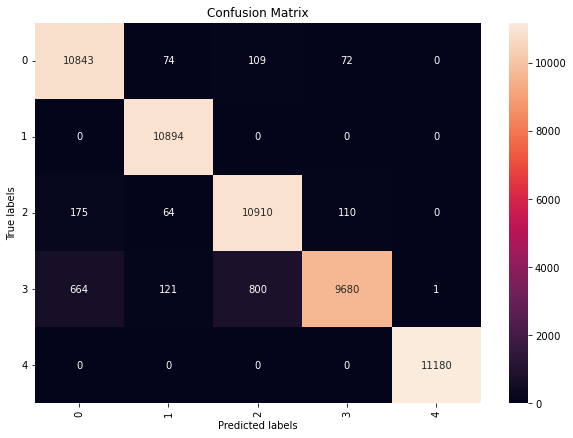

In [162]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

#  Random Forest Classifier

In [163]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [164]:
#Instantiate random forest classifier, fit and score with default parameters
rf = RandomForestClassifier()
rf.fit(training_data, training_labels)
rf.score(validation_data, validation_labels)
print(f'Accuracy score for default random forest: {round(rf.score(validation_data, validation_labels)*100,3)}%')



Accuracy score for default random forest: 99.657%


In [165]:
np.random.seed(0)
accuracy_train = []
accuracy_test = []
depths = range(1, 26)

for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(training_data, training_labels)
    accuracy_test.append(accuracy_score(validation_labels, rf.predict(validation_data)))
    accuracy_train.append(accuracy_score(training_labels, rf.predict(training_data)))

# Find the best accuracy and the depth where it occurs
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test set is achieved when depth = {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc * 100, 3)}%')


The highest accuracy on the test set is achieved when depth = 25
The highest accuracy on the test set is: 99.641%


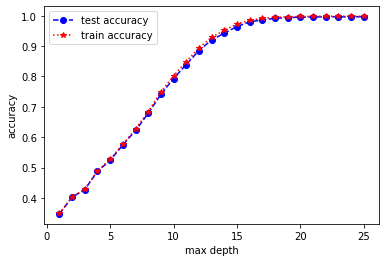

In [166]:
#Plot the accuracy scores for the test and train set over the range of depth values  
plt.plot(depths, accuracy_test,'bo--',depths, accuracy_train,'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()



In [167]:
#Save the best random forest model and save the feature importances in a dataframe
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(validation_data, validation_labels)
feature_imp_df = pd.DataFrame(zip(training_data.columns, best_rf.feature_importances_),  columns=['feature', 'importance'])
print('Top 9 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:9])

Top 9 random forest features:
            feature  importance
0               age    0.220650
7            height    0.188487
5  education_rating    0.127214
2       body_rating    0.119170
6         ethnicity    0.095192
3       diet_rating    0.088850
1     drinks_rating    0.055478
4      drugs_rating    0.054520
8            income    0.050438


In [168]:
# Make predictions
y_pred = best_rf.predict(validation_data)

C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.27      0.35      0.31     11098
           1       0.27      0.28      0.28     10894
           2       0.00      0.00      0.00     11259
           3       0.30      0.33      0.32     11266
           4       0.44      0.70      0.54     11180

    accuracy                           0.33     55697
   macro avg       0.26      0.33      0.29     55697
weighted avg       0.26      0.33      0.29     55697



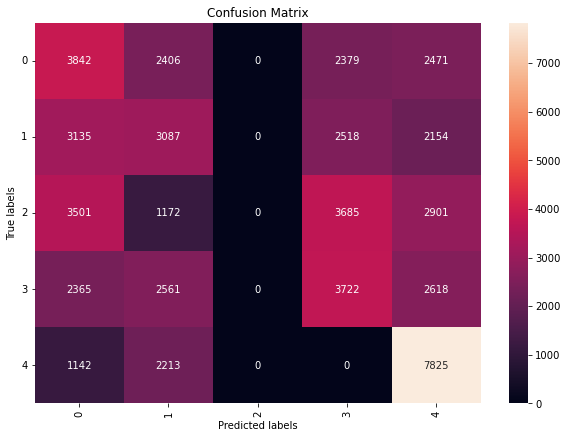

In [190]:
print(classification_report(validation_labels, y_pred))

cart_cm = confusion_matrix(validation_labels, y_pred)
cart_labels = rf.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

Adpative boosting 

In [171]:
from sklearn.ensemble import AdaBoostClassifier

# Create a decision stump base model using the Decision Tree Classifier
decision_stump = DecisionTreeClassifier(max_depth=1)

# Print the parameters of the decision stump
print(decision_stump.get_params())


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [172]:
# Create an AdaBoost classifier using the decision stump as the base estimator
ada_classifier = AdaBoostClassifier(estimator=decision_stump, n_estimators=5)

# Print the parameters of the AdaBoost model
print(ada_classifier.get_params())



{'algorithm': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 1, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 5, 'random_state': None}


In [176]:
# Fit the AdaBoost classifier to the training data
ada_classifier.fit(training_data, training_labels)

# Predict the classes of the testing dataset
y_pred_ada = ada_classifier.predict(validation_data)


In [177]:
# Calculate the accuracy, precision, recall, and f1-score on the testing data
accuracy = accuracy_score(validation_labels, y_pred_ada)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Test set accuracy:\t{accuracy}')
#print(f'Test set precision:\t{precision}')
#print(f'Test set recall:\t{recall}')
#print(f'Test set f1-score:\t{f1}')


#training_data, validation_data, training_labels, validation_labels

Test set accuracy:	0.3317234321417671


In [178]:
# Remove the comments from the following code block to print the confusion matrix

test_conf_matrix = pd.DataFrame(
     confusion_matrix(validation_labels, y_pred_ada, labels=[1, 0]), 
     index=['actual yes', 'actual no'], 
     columns=['predicted yes', 'predicted no']
 )
print(f'Confusion Matrix:\n{test_conf_matrix.to_string()}')

Confusion Matrix:
            predicted yes  predicted no
actual yes           3087          3135
actual no            2406          3842


C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.27      0.35      0.31     11098
           1       0.27      0.28      0.28     10894
           2       0.00      0.00      0.00     11259
           3       0.30      0.33      0.32     11266
           4       0.44      0.70      0.54     11180

    accuracy                           0.33     55697
   macro avg       0.26      0.33      0.29     55697
weighted avg       0.26      0.33      0.29     55697



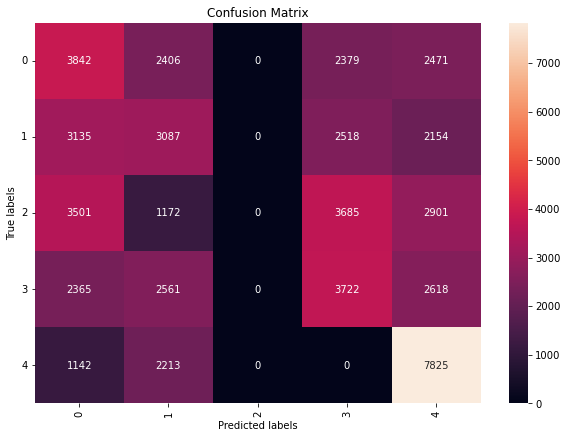

In [196]:
print(classification_report(validation_labels, y_pred_ada))

cart_cm = confusion_matrix(validation_labels, y_pred_ada)
cart_labels = ada_classifier.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

# Naive Bayes Classifier

The ultimate aim is to predict the probability of two particular groups of people with similar characteristics becomming a match. For example, two people that like cycling may be a good matach. Also we could predict the likely hood that a person will remain single or move into a long term relationship based of a numer of key characteristics. 

Using the Naive-Bayes theorem we could calculate the probability the a client will remain single and the probability that the client will not remain single. 

For example, let’s say we’re trying to classify an email as either spam or not spam. We could calculate P(spam | email) and P(not spam | email). Whichever probability is higher will be the classifier’s prediction. Naive Bayes classifiers are often used for text classification.



In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [198]:
# Create and Train Naive Bayes Model: Initialize and fit the model.

nb = GaussianNB()
nb.fit(training_data, training_labels)


GaussianNB()

In [199]:
# Calculate Probabilities: Use the model to predict probabilities.
probabilities = nb.predict_proba(validation_data)
pred_nb = nb.predict(validation_data)

In [200]:
# Output Probabilities: Print the probabilities for each class.

for i, prob in enumerate(probabilities):
    print(f"Sample {i}: Probability of remaining single: {prob[1]:.2f}, Probability of not remaining single: {prob[0]:.2f}")


Sample 0: Probability of remaining single: 0.01, Probability of not remaining single: 0.00
Sample 1: Probability of remaining single: 0.04, Probability of not remaining single: 0.07
Sample 2: Probability of remaining single: 0.16, Probability of not remaining single: 0.26
Sample 3: Probability of remaining single: 0.04, Probability of not remaining single: 0.03
Sample 4: Probability of remaining single: 0.05, Probability of not remaining single: 0.06
Sample 5: Probability of remaining single: 0.05, Probability of not remaining single: 0.06
Sample 6: Probability of remaining single: 0.18, Probability of not remaining single: 0.06
Sample 7: Probability of remaining single: 0.05, Probability of not remaining single: 0.06
Sample 8: Probability of remaining single: 0.03, Probability of not remaining single: 0.05
Sample 9: Probability of remaining single: 0.10, Probability of not remaining single: 0.02
Sample 10: Probability of remaining single: 0.07, Probability of not remaining single: 0.0

Sample 3415: Probability of remaining single: 0.07, Probability of not remaining single: 0.08
Sample 3416: Probability of remaining single: 0.10, Probability of not remaining single: 0.10
Sample 3417: Probability of remaining single: 0.05, Probability of not remaining single: 0.08
Sample 3418: Probability of remaining single: 0.04, Probability of not remaining single: 0.05
Sample 3419: Probability of remaining single: 0.08, Probability of not remaining single: 0.04
Sample 3420: Probability of remaining single: 0.05, Probability of not remaining single: 0.06
Sample 3421: Probability of remaining single: 0.18, Probability of not remaining single: 0.27
Sample 3422: Probability of remaining single: 0.14, Probability of not remaining single: 0.20
Sample 3423: Probability of remaining single: 0.01, Probability of not remaining single: 0.00
Sample 3424: Probability of remaining single: 0.06, Probability of not remaining single: 0.07
Sample 3425: Probability of remaining single: 0.04, Probabil

Sample 6652: Probability of remaining single: 0.06, Probability of not remaining single: 0.05
Sample 6653: Probability of remaining single: 0.19, Probability of not remaining single: 0.26
Sample 6654: Probability of remaining single: 0.04, Probability of not remaining single: 0.04
Sample 6655: Probability of remaining single: 0.05, Probability of not remaining single: 0.06
Sample 6656: Probability of remaining single: 0.03, Probability of not remaining single: 0.04
Sample 6657: Probability of remaining single: 0.10, Probability of not remaining single: 0.14
Sample 6658: Probability of remaining single: 0.05, Probability of not remaining single: 0.07
Sample 6659: Probability of remaining single: 0.07, Probability of not remaining single: 0.04
Sample 6660: Probability of remaining single: 0.06, Probability of not remaining single: 0.07
Sample 6661: Probability of remaining single: 0.01, Probability of not remaining single: 0.00
Sample 6662: Probability of remaining single: 0.06, Probabil

Sample 10151: Probability of remaining single: 0.12, Probability of not remaining single: 0.11
Sample 10152: Probability of remaining single: 0.07, Probability of not remaining single: 0.04
Sample 10153: Probability of remaining single: 0.04, Probability of not remaining single: 0.04
Sample 10154: Probability of remaining single: 0.15, Probability of not remaining single: 0.16
Sample 10155: Probability of remaining single: 0.08, Probability of not remaining single: 0.07
Sample 10156: Probability of remaining single: 0.06, Probability of not remaining single: 0.04
Sample 10157: Probability of remaining single: 0.07, Probability of not remaining single: 0.03
Sample 10158: Probability of remaining single: 0.07, Probability of not remaining single: 0.04
Sample 10159: Probability of remaining single: 0.15, Probability of not remaining single: 0.22
Sample 10160: Probability of remaining single: 0.10, Probability of not remaining single: 0.12
Sample 10161: Probability of remaining single: 0.0

Sample 14151: Probability of remaining single: 0.03, Probability of not remaining single: 0.01
Sample 14152: Probability of remaining single: 0.04, Probability of not remaining single: 0.04
Sample 14153: Probability of remaining single: 0.07, Probability of not remaining single: 0.04
Sample 14154: Probability of remaining single: 0.07, Probability of not remaining single: 0.04
Sample 14155: Probability of remaining single: 0.14, Probability of not remaining single: 0.19
Sample 14156: Probability of remaining single: 0.09, Probability of not remaining single: 0.06
Sample 14157: Probability of remaining single: 0.08, Probability of not remaining single: 0.10
Sample 14158: Probability of remaining single: 0.07, Probability of not remaining single: 0.05
Sample 14159: Probability of remaining single: 0.22, Probability of not remaining single: 0.21
Sample 14160: Probability of remaining single: 0.03, Probability of not remaining single: 0.01
Sample 14161: Probability of remaining single: 0.1

Sample 17650: Probability of remaining single: 0.04, Probability of not remaining single: 0.06
Sample 17651: Probability of remaining single: 0.28, Probability of not remaining single: 0.37
Sample 17652: Probability of remaining single: 0.03, Probability of not remaining single: 0.03
Sample 17653: Probability of remaining single: 0.11, Probability of not remaining single: 0.04
Sample 17654: Probability of remaining single: 0.10, Probability of not remaining single: 0.07
Sample 17655: Probability of remaining single: 0.28, Probability of not remaining single: 0.32
Sample 17656: Probability of remaining single: 0.04, Probability of not remaining single: 0.07
Sample 17657: Probability of remaining single: 0.22, Probability of not remaining single: 0.17
Sample 17658: Probability of remaining single: 0.04, Probability of not remaining single: 0.07
Sample 17659: Probability of remaining single: 0.07, Probability of not remaining single: 0.08
Sample 17660: Probability of remaining single: 0.2

Sample 21650: Probability of remaining single: 0.16, Probability of not remaining single: 0.26
Sample 21651: Probability of remaining single: 0.50, Probability of not remaining single: 0.25
Sample 21652: Probability of remaining single: 0.31, Probability of not remaining single: 0.31
Sample 21653: Probability of remaining single: 0.02, Probability of not remaining single: 0.02
Sample 21654: Probability of remaining single: 0.33, Probability of not remaining single: 0.32
Sample 21655: Probability of remaining single: 0.03, Probability of not remaining single: 0.04
Sample 21656: Probability of remaining single: 0.03, Probability of not remaining single: 0.04
Sample 21657: Probability of remaining single: 0.05, Probability of not remaining single: 0.07
Sample 21658: Probability of remaining single: 0.07, Probability of not remaining single: 0.04
Sample 21659: Probability of remaining single: 0.40, Probability of not remaining single: 0.31
Sample 21660: Probability of remaining single: 0.0

Sample 25649: Probability of remaining single: 0.04, Probability of not remaining single: 0.05
Sample 25650: Probability of remaining single: 0.10, Probability of not remaining single: 0.15
Sample 25651: Probability of remaining single: 0.05, Probability of not remaining single: 0.05
Sample 25652: Probability of remaining single: 0.35, Probability of not remaining single: 0.28
Sample 25653: Probability of remaining single: 0.12, Probability of not remaining single: 0.08
Sample 25654: Probability of remaining single: 0.11, Probability of not remaining single: 0.13
Sample 25655: Probability of remaining single: 0.04, Probability of not remaining single: 0.00
Sample 25656: Probability of remaining single: 0.05, Probability of not remaining single: 0.06
Sample 25657: Probability of remaining single: 0.06, Probability of not remaining single: 0.08
Sample 25658: Probability of remaining single: 0.03, Probability of not remaining single: 0.04
Sample 25659: Probability of remaining single: 0.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



              precision    recall  f1-score   support

           0       0.30      0.11      0.16     11098
           1       0.40      0.07      0.13     10894
           2       0.30      0.07      0.11     11259
           3       0.27      0.04      0.07     11266
           4       0.25      1.00      0.40     11180

    accuracy                           0.26     55697
   macro avg       0.30      0.26      0.17     55697
weighted avg       0.30      0.26      0.17     55697



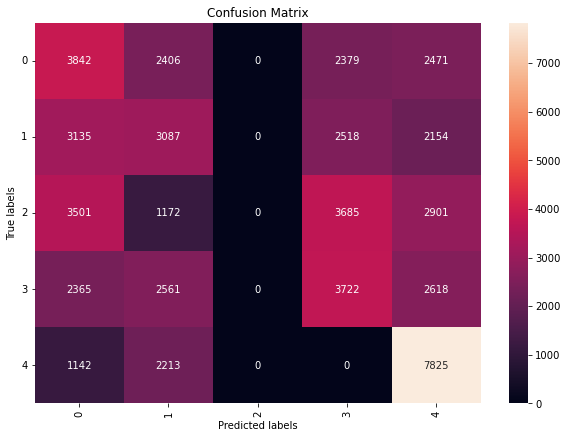

In [203]:
print(classification_report(validation_labels, pred_nb))

cart_cm = confusion_matrix(validation_labels, y_pred)
cart_labels = nb.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

# Deep Learning 

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np



# Initialize and train a Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=1)
perceptron.fit(training_data, training_labels)

# Evaluate the model
y_pred_dl = perceptron.predict(training_data)
accuracy = accuracy_score(training_labels, y_pred_dl)
print(f"Test Accuracy: {accuracy}")

# Example: Get decision function scores
decision_scores = perceptron.decision_function(validation_data[:5])
print(f"Decision Function Scores: {decision_scores}")




Test Accuracy: 0.20619153634845683
Decision Function Scores: [[-3.84769000e+05 -5.98191000e+05 -1.02689800e+06 -3.40950000e+05
   7.57295000e+05]
 [ 1.50710000e+04 -1.70181000e+05 -5.46422000e+05 -6.26820000e+04
   8.74995000e+05]
 [-1.90900080e+10  4.01748468e+09  3.98507539e+10 -1.81819463e+09
  -4.89379413e+10]
 [-9.31590000e+04 -1.80345000e+05 -7.60135000e+05 -1.20612000e+05
   8.55554000e+05]
 [ 2.25890000e+04 -9.61030000e+04 -5.90077000e+05 -8.88770000e+04
   8.53262000e+05]]


In [218]:
# Visualization (optional if only two features are used)
if training_data.shape[1] == 2:  # Check if the input has only 2 features
    import matplotlib.pyplot as plt
    from itertools import product

    x_min, x_max = training_data[:, 0].min() - 1, training_data[:, 0].max() + 1
    y_min, y_max = training_data[:, 1].min() - 1, training_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    zz = perceptron.decision_function(grid_points).reshape(xx.shape)

    plt.contourf(xx, yy, zz, levels=[-1, 0, 1], alpha=0.3, cmap='coolwarm')
    plt.scatter(training_data[:, 0], training_data[:, 1], c=training_labels, cmap='coolwarm', edgecolor='k')
    plt.title("Perceptron Decision Boundary")
    plt.show()

C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.17      0.33      0.22     11098
           1       0.21      0.63      0.31     10894
           2       0.00      0.00      0.00     11259
           3       0.00      0.00      0.00     11266
           4       0.00      0.00      0.00     11180

    accuracy                           0.19     55697
   macro avg       0.07      0.19      0.11     55697
weighted avg       0.07      0.19      0.10     55697



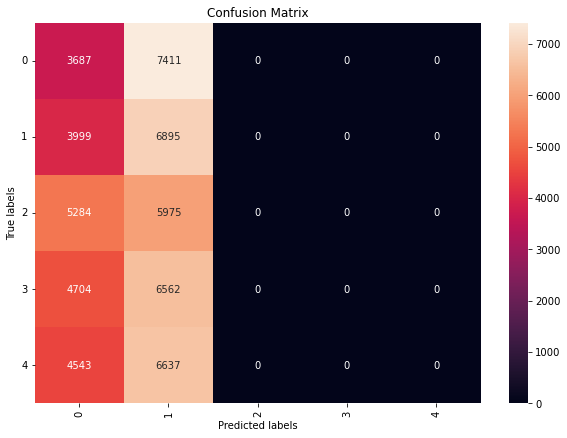

In [215]:
print(classification_report(validation_labels, y_pred))

cart_cm = confusion_matrix(validation_labels, y_pred)
cart_labels = perceptron.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);